# <span style="color: red; font-size: larger;">Пока все ещё тут</span> 🏡

Всем привет и добро пожаловать в компанию <span style="color: red; font-size: larger;">«Пока все ещё тут»</span> 🏡

Интернет-магазин товаров для дома <span style="color: red; font-size: larger;">«Пока все ещё тут»</span> в срочном порядке ищет аналитиков. Вы поможете нашему магазину стать лучше, а клиентам — обустроить дом своей мечты. Наши ближайшие задачи — расчёт метрик и создание гипотез на основе полученных данных. 
<span style="color: red; font-size: larger;">«Пока все ещё тут»— мы создаём уют! </span> 

**Задача**
Сегментировать покупателей по профилю потребления для осуществления рекламных рассылок, то есть составить подробные рекомендации заказчику по сегментам покупателей.


# <font color='orangered'> Оглавление </font> 

1. [Загрузка данных](#final1)
2. [Предобработка данных](#final2)

    * [Поиск и удаление дубликатов](#final2_1) 
    * [Дополнительные столбцы](#final2_2) 
    * [Формирование категорий товаров](#final2_3)
    * [Вывод по разделу](#final2_4)
    
    
    
      
3. [Исследовательский анализ данных (портрет потребителя)](#final3)
    
    * [Общая характеристика клиентов](#final3_1) 
    * [Топ 5 продаж товаров и топ 5 в каждой категории](##final3_2) 
    * [Динамика продаж в целом и по категориям](##final3_3) 
    * [Точечные графики кол-ва заказов по пользователям и стоимости заказа на 1 пользователя](#final3_4)
    * [Вывод по разделу](#final3_5)
  
4. [Кластеризация пользователей](#final_4)
    * [Отбор признаков для разработки модели](#final4_1) 
    * [Стандартизирование данных](#final4_2) 
    * [Модель кластеризации на основании алгоритма K-Means](#final4_3) 
    * [Характеристики кластеров](#final4_4) 
    * [Выводы по разделу](#final4_5) 

5. [Проверка гипотез о статистической заначимости в различных группах](#final_5)
    * [Формулировка статистистических гипотез](#final_5_1) 
    * [Определение p-value и альфа](#final_5_2)
    * [Выбор метода проведения теста](#final_5_3)
    * [Проверка гипотезы 1](#final_5_4)
    * [Проверка гипотезы 2](#final_5_5)
    
6. [Вывод и рекомендации](#final_end)


## Загрузка данных и библиотек <a id="final1"></a> 
«Пока все ещё тут» предоставил сведения в csv-файле. Заказчик подготовил данные, которые содержат следующие поля:
    **Данные клиента за период с 01.10.2018 по 31.01.2020**:

  - 'date' — дата покупки;
  - 'customer_id' — уникальный идентификационный номер покупателя в системе;
  - 'order_id' — уникальный номер заказа в системе;
  - 'product' - наименование продукта;
  - 'price' — цена продукта;
  - 'quantity' — количество продукта в заказе;

На данном этапе необходимо привести данные к нужному формату и описать в каких столбцах заменили тип данных и почему.

Путь к файлу: **/datasets/gym_churn.csv**

In [1]:
import с as pd
import  warnings
warnings.filterwarnings("ignore")
import numpy as np
#Графики
import seaborn as sns
import matplotlib.pyplot as plt
#ML
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
#Статистика
from scipy.cluster.hierarchy import dendrogram, linkage
import scipy.stats as stats
from scipy.stats import levene
from scipy.stats import shapiro

In [2]:
data = pd.read_csv ('https://code.s3.yandex.net/datasets/ecom_dataset_upd.csv')

In [3]:
def analyze_dataframe(df):
    """
    Функция принимает DataFrame и выводит его основную информацию,
    включая общее количество пропусков, названия столбцов,
    а также первые несколько строк данных, оценивает наличие полных дубликатов.
    """
    print('\033[1m'+'Общая информация о DataFrame'+'\033[0m')
    print(df.info())
        
    print('\033[1m'+"\nПропуски в данных:"+'\033[0m')
    missing_data = df.isnull().sum()
    print(missing_data[missing_data > 0])
    
    print('\033[1m'+"\nНазвания столбцов:"+'\033[0m')
    print(df.columns.tolist())
        
    print('\033[1m'+"\nПервые пять строк данных:"+'\033[0m')
    print(df.head())
        
    missing_values = df.isnull().sum()
    print('\033[1m'+"\nКоличество пропусков:"+'\033[0m', missing_values[missing_values > 0])
        
    duplicate_count = df.duplicated().sum()
    print('\033[1m'+"\nКоличество дубликатов:"+'\033[0m', duplicate_count)

In [4]:
def plot_histograms(data, figsize=(15, 10), color='orange', suptitle='Гистограммы числовых значений датасета'):
    """
    Функция строит гистограммы для всех числовых столбцов в DataFrame.
    Параметры:
    - data: DataFrame pandas, содержащий числовые данные.
    - figsize: Кортеж для определения размера графика.
    - color: Цвет гистограмм.
    - suptitle: Заголовок всего графика.
    """
    
    numeric_cols = data.select_dtypes(include=['number']).columns
    num_cols_count = len(numeric_cols)
    
    
    nrows = (num_cols_count + 1) // 2  
    ncols = 2  
        
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=figsize)
    axes = axes.flatten()  
    
    
    for i, col in enumerate(numeric_cols):
        axes[i].hist(data[col], color=color)  
        axes[i].set_title(f'столбец {col}')
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('частота')
    
    
    for j in range(i + 1, nrows * ncols):
        fig.delaxes(axes[j])
    
    plt.suptitle(suptitle, ha='center', fontsize='xx-large', color='orangered')
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Подгонка под заголовок
    plt.show()

In [5]:
analyze_dataframe(data)

Общая информация о DataFrame
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7474 entries, 0 to 7473
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         7474 non-null   int64  
 1   customer_id  7474 non-null   object 
 2   order_id     7474 non-null   int64  
 3   product      7474 non-null   object 
 4   quantity     7474 non-null   int64  
 5   price        7474 non-null   float64
dtypes: float64(1), int64(3), object(2)
memory usage: 350.5+ KB
None

Пропуски в данных:
Series([], dtype: int64)

Названия столбцов:
['date', 'customer_id', 'order_id', 'product', 'quantity', 'price']

Первые пять строк данных:
         date                           customer_id  order_id  \
0  2018100100  ee47d746-6d2f-4d3c-9622-c31412542920     68477   
1  2018100100  ee47d746-6d2f-4d3c-9622-c31412542920     68477   
2  2018100100  ee47d746-6d2f-4d3c-9622-c31412542920     68477   
3  2018100100  ee47d746-6d2f-4d3c-9622-c

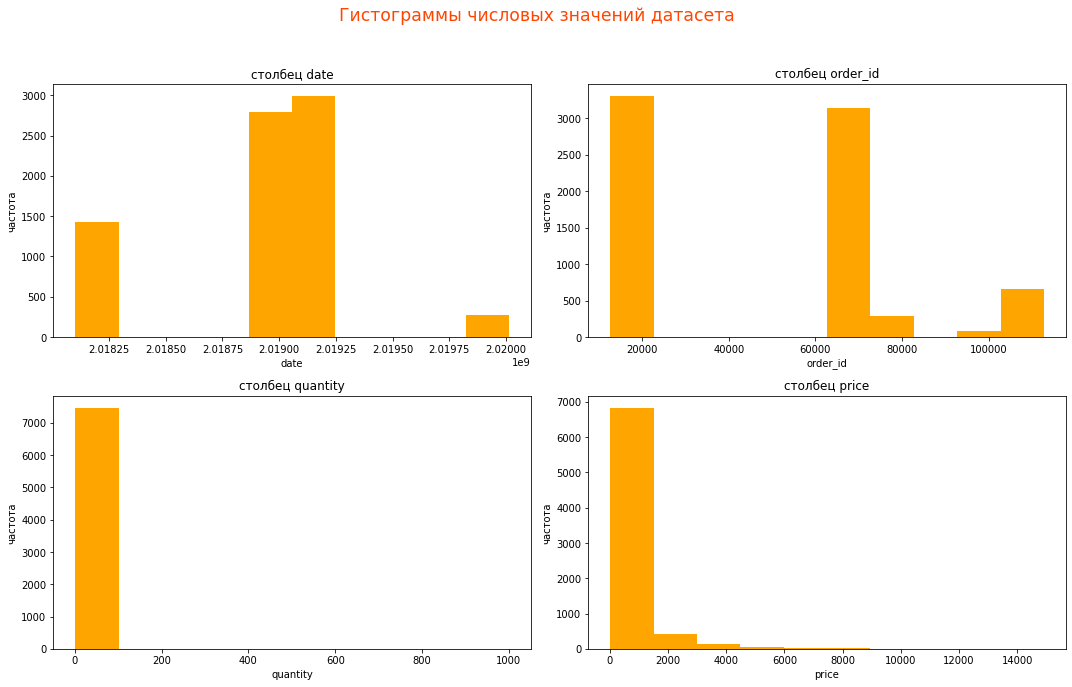

In [6]:
plot_histograms(data)

In [7]:
data['date'] = pd.to_datetime(data['date'], format='%Y%m%d%H')

In [8]:
print('Тип данных столбца date', data['date'].dtype)

Тип данных столбца date datetime64[ns]


In [9]:
print ('минимальная дата', data['date'].min())

минимальная дата 2018-10-01 00:00:00


In [10]:
print ('максимальная дата', data['date'].max())

максимальная дата 2020-01-31 15:00:00


**Вывод**

Датафрейм содержит <font color='orangered'>7473</font> строки данных. Он не имеет пропусков и полных дубликатов. Содержит столбцы `date`, `customer_id`, `order_id`, `product`, `quantity`, `price`. Все столбцы, кроме столбца `date`, содержат корректный тип данных. Тип данных столбца `date` был преобразован в формат `datetime`.

В данных представлен период с 10.01.2018 по 31.01.2020.

## Предобработка данных<a id="final_2"></a> 

  - поиск и удаление дубликатов;
  - создание дополнительных столбцов с общей ценой товара ('total_price') и месяцем покупки ('month');
  - создание уникальных категорий товара ('category);
  - вывод по разделу

### Поиск и удаление дубликатов <a id="final2_1"></a> 

По условиям задания каждому `customer_id` соответствует уникальный `order_id`, а последнему, в свою очередь, соответствует ряд `product`, которые не должны повторяться в одном заказе (потому что в этом случае будет просто 2 и более по колонке `quantity`). 

Проверим данные на возможные дубликаты, сгруппировав их по `customer_id` и `product`. Затем выведем только те записи, где на каждую уникальную пару `customer_id` и `product` приходится более одного `order_id`.

In [11]:
duplicate_check = data.groupby(['customer_id', 'product'])['order_id'].nunique().reset_index()
duplicate_orders = duplicate_check[duplicate_check['order_id'] > 1]
duplicate_orders

,customer_id,product,order_id
97,036118cf-c198-48fa-ba15-6d841482a56d,Салатник ВОЛАРЭ БЛЭК 16 см G9403 Luminarc,2
98,036118cf-c198-48fa-ba15-6d841482a56d,Тарелка суповая ВОЛАРЭ БЛЭК 23 см G9402 Luminarc,2
168,07abcccf-1887-4b4e-b6bf-8054759bc419,Штора для ванной комнаты полиэстер Dasch 180х1...,2
179,08199320-6a87-4a2c-8565-dfc0c8484184,Гипсофила Аврора 80 см Израиль 25 штук в упаковке,2
256,0d1b15b6-9cf3-4642-8bc3-74c7dee7b40e,Пеларгония розебудная Mary укорененный черенок,2
...,...,...,...
5227,f30fea52-f096-4d36-b7eb-33f9f42c291d,Чехол для гладильной доски Zalger 520109 130х4...,2
5239,f3639fa4-5db8-402e-91d7-53f7f6b3a519,Коврик придверный хлопковый 55х110 см мультико...,2
5353,fa9140d4-3efb-4e64-bf91-9c53163ec791,Комод Эльфпласт № 3 Алфавит оранжевый 301о,2
5374,fb2f95f0-1f30-4e6a-a75c-92d1e2d341e3,"Сушилка для белья на батарею, СБ5-45, НИКА",2


In [12]:
data.query ('customer_id == "036118cf-c198-48fa-ba15-6d841482a56d"')

,date,customer_id,order_id,product,quantity,price
1055,2018-12-02 15:00:00,036118cf-c198-48fa-ba15-6d841482a56d,69175,Салатник ВОЛАРЭ БЛЭК 16 см G9403 Luminarc,6,97.0
1056,2018-12-02 15:00:00,036118cf-c198-48fa-ba15-6d841482a56d,69175,Тарелка суповая ВОЛАРЭ БЛЭК 23 см G9402 Luminarc,3,127.0
1057,2018-12-02 15:00:00,036118cf-c198-48fa-ba15-6d841482a56d,69176,Салатник ВОЛАРЭ БЛЭК 16 см G9403 Luminarc,6,97.0
1058,2018-12-02 15:00:00,036118cf-c198-48fa-ba15-6d841482a56d,69176,Тарелка суповая ВОЛАРЭ БЛЭК 23 см G9402 Luminarc,3,127.0


In [13]:
data.query ('customer_id == "f3639fa4-5db8-402e-91d7-53f7f6b3a519"')

,date,customer_id,order_id,product,quantity,price
2293,2019-03-12 10:00:00,f3639fa4-5db8-402e-91d7-53f7f6b3a519,70702,Коврик придверный хлопковый 55х110 см мультико...,1,209.0
2583,2019-04-01 11:00:00,f3639fa4-5db8-402e-91d7-53f7f6b3a519,70951,Коврик придверный хлопковый 55х110 см мультико...,1,209.0


Как видно из первого и второго случая выше, возможен вариант "технической ошибки": пользователем создано 2 уникальных заказа с одним и тем же набором товаров и датой. Есть предположение, что пользователь добавил в корзину товары, но возникли проблемы с оплатой, в результате чего сохранился уникальный `order_id`, а система автоматически создала второй заказ. Также возможно присвоение `order_id` заказу в корзине на каком-то этапе оформления заказа. 

В любом случае найденные аномалии необходимо отправить инженерам данных, чтобы они разобрались с проблемой. При обработке дубликатов мы удалим первый заказ и сохраним только последний в первом случае. Во втором случае заказы созданы в разные дни, то есть вариант "технической ошибки" исключен. Возможно, пользователю просто понравился товар.

In [14]:
data['day_date'] =  data['date'].dt.to_period('D')

In [15]:
data_before_cleaning=data.shape[0]

In [16]:
data = data.drop_duplicates(subset=['day_date','customer_id', 'product'], keep='last')

In [17]:
data_after_cleaning = data.shape[0]

In [18]:
print('кол-во удаленных строк', 
      data_before_cleaning - data_after_cleaning, 'или', 
      '{:.2f}'.format((data_before_cleaning - data_after_cleaning) * 100 / data_before_cleaning), '%')

кол-во удаленных строк 1014 или 13.57 %


In [19]:
duplicate_check1 = data.groupby(['customer_id', 'product'])['order_id'].nunique().reset_index()
duplicate_orders1 = duplicate_check1[duplicate_check1['order_id'] > 1]
duplicate_orders1

,customer_id,product,order_id
168,07abcccf-1887-4b4e-b6bf-8054759bc419,Штора для ванной комнаты полиэстер Dasch 180х1...,2
179,08199320-6a87-4a2c-8565-dfc0c8484184,Гипсофила Аврора 80 см Израиль 25 штук в упаковке,2
256,0d1b15b6-9cf3-4642-8bc3-74c7dee7b40e,Пеларгония розебудная Mary укорененный черенок,2
258,0d1b15b6-9cf3-4642-8bc3-74c7dee7b40e,Пеларгония тюльпановидная EMMA,2
344,126dac4d-6486-49ed-a1be-9fd55a38a9de,Сумка-тележка хозяйственная Andersen Scala Sho...,2
...,...,...,...
5059,ebf536f7-48c3-4f36-81ce-f37aed87faab,Гладильная доска Sarayli New Elegant 125x45 см,2
5188,f163e581-59ba-4022-99db-e0973c7497c0,Штора для ванной комнаты Bacchetta Dama тексти...,2
5239,f3639fa4-5db8-402e-91d7-53f7f6b3a519,Коврик придверный хлопковый 55х110 см мультико...,2
5353,fa9140d4-3efb-4e64-bf91-9c53163ec791,Комод Эльфпласт № 3 Алфавит оранжевый 301о,2


In [20]:
data.query ('customer_id == "07abcccf-1887-4b4e-b6bf-8054759bc419"')

,date,customer_id,order_id,product,quantity,price,day_date
4499,2019-06-04 17:00:00,07abcccf-1887-4b4e-b6bf-8054759bc419,71605,Штора для ванной комнаты полиэстер Dasch 180х1...,1,329.0,2019-06-04
4646,2019-06-05 16:00:00,07abcccf-1887-4b4e-b6bf-8054759bc419,71620,Штора для ванной комнаты полиэстер Dasch 180х1...,3,329.0,2019-06-05


In [21]:
data.query ('customer_id == "ff31d802-dae6-484d-a3dc-c9723f1cb538"')

,date,customer_id,order_id,product,quantity,price,day_date
2755,2019-04-09 11:00:00,ff31d802-dae6-484d-a3dc-c9723f1cb538,71074,Стремянки Colombo Leonardo 2 ступени G300A02W ...,1,2999.0,2019-04-09
2764,2019-04-10 08:00:00,ff31d802-dae6-484d-a3dc-c9723f1cb538,71074,Стремянки Colombo Leonardo 2 ступени G300A02W ...,1,2999.0,2019-04-10
3417,2019-05-07 02:00:00,ff31d802-dae6-484d-a3dc-c9723f1cb538,71363,Стремянки Colombo Leonardo 2 ступени G300A02W ...,1,2999.0,2019-05-07
3444,2019-05-08 02:00:00,ff31d802-dae6-484d-a3dc-c9723f1cb538,71363,Стремянки Colombo Leonardo 2 ступени G300A02W ...,1,2999.0,2019-05-08
3503,2019-05-10 03:00:00,ff31d802-dae6-484d-a3dc-c9723f1cb538,71363,Стремянки Colombo Leonardo 2 ступени G300A02W ...,1,2999.0,2019-05-10
3589,2019-05-13 02:00:00,ff31d802-dae6-484d-a3dc-c9723f1cb538,71363,Стремянки Colombo Leonardo 2 ступени G300A02W ...,1,2999.0,2019-05-13
3735,2019-05-14 02:00:00,ff31d802-dae6-484d-a3dc-c9723f1cb538,71363,Стремянки Colombo Leonardo 2 ступени G300A02W ...,1,2999.0,2019-05-14


Так теперь мы видим что один и тот же товар имеет одинаковый order_id, сustomer_id, product но сформирован в разные даты. Что тоже является вариантом технической ошибки и возможно возникает на каком то этапе нахождения товара в корзине. 

In [22]:
data_cleaned  = data.drop_duplicates(subset=['customer_id', 'order_id','product'], keep='last')

In [23]:
data_cleaned.query ('customer_id == "ff31d802-dae6-484d-a3dc-c9723f1cb538"')

,date,customer_id,order_id,product,quantity,price,day_date
2764,2019-04-10 08:00:00,ff31d802-dae6-484d-a3dc-c9723f1cb538,71074,Стремянки Colombo Leonardo 2 ступени G300A02W ...,1,2999.0,2019-04-10
3735,2019-05-14 02:00:00,ff31d802-dae6-484d-a3dc-c9723f1cb538,71363,Стремянки Colombo Leonardo 2 ступени G300A02W ...,1,2999.0,2019-05-14


In [24]:
data_after_second_cleaning = data_cleaned.shape[0]

In [25]:
print('кол-во удаленных строк', 
      data_before_cleaning - data_after_second_cleaning, 'или', 
      '{:.2f}'.format((data_before_cleaning - data_after_second_cleaning) * 100 / data_before_cleaning), '%')

кол-во удаленных строк 1916 или 25.64 %


In [26]:
print('кол-во строк данных после очистки', 
      '{:.0f}'.format(data_after_second_cleaning), 'строк')

кол-во строк данных после очистки 5558 строк


Проверим наличие нескольких покупателей у одного заказа.

In [27]:
duplicate_order_id = data_cleaned.groupby('order_id')['customer_id'].nunique().reset_index()
duplicate_order_id = duplicate_order_id[duplicate_order_id['customer_id'] > 1]
duplicate_order_id


,order_id,customer_id
248,14872,2
516,68785,2
794,69283,2
814,69310,2
829,69345,2
859,69410,2
899,69485,3
930,69531,2
1062,69833,2
1194,70114,2


In [28]:
data_cleaned.query ('order_id == 72950')

,date,customer_id,order_id,product,quantity,price,day_date
6601,2019-10-13 15:00:00,b1dbc7c4-3c84-40a7-80c9-46e2f79d24ad,72950,Кастрюля эмалированная Стэма С-1624 12 л цилин...,1,974.0,2019-10-13
6606,2019-10-14 09:00:00,2f1671cc-47eb-49bb-a40b-808375f4218b,72950,Кастрюля эмалированная Стэма С-1624 12 л цилин...,1,974.0,2019-10-14


In [29]:
data_cleaned.query ('order_id == 71480')

,date,customer_id,order_id,product,quantity,price,day_date
3963,2019-05-21 02:00:00,4bd9c1e8-b2cc-4ec5-97eb-28d8f3c22d8d,71480,Мята перечная Шоколадная Chocolate d-7 см h-10...,1,74.0,2019-05-21
4025,2019-05-24 22:00:00,d8080f8f-3685-433b-b416-beb0a8f06606,71480,Мята перечная Шоколадная Chocolate d-7 см h-10...,1,74.0,2019-05-24
4026,2019-05-25 02:00:00,51f04abe-a71a-4694-87b7-ad9ef4930e51,71480,Мята перечная Шоколадная Chocolate d-7 см h-10...,1,74.0,2019-05-25


Вышеуказанные заказы совершены разными покупателями, но товар в корзине один и тот же. Предположим, что система просто присваивает другой `customer_id` заказу, и это также можно классифицировать как вариант технической ошибки. 

Необходимо удалить эти заказы. Для удаления будем использовать уникальную пару `order_id`, `product`, `quantity` и `price`.

In [30]:
data__super_cleaned  = data_cleaned.drop_duplicates(subset=['order_id','product', 'quantity', 'price'], keep='last')

In [31]:
data_after_third_cleaning = data__super_cleaned.shape[0]

In [32]:
print('кол-во удаленных строк всего', 
      data_before_cleaning - data_after_third_cleaning, 'или', 
      '{:.2f}'.format((data_before_cleaning - data_after_third_cleaning) * 100 / data_before_cleaning), '%')
print('кол-во строк данных после очистки', 
      '{:.0f}'.format(data_after_third_cleaning), 'строк')


кол-во удаленных строк всего 1948 или 26.06 %
кол-во строк данных после очистки 5526 строк


### Создание дополнительных столбцов <a id="final2_2"></a> 

In [33]:
data_cleaned = data__super_cleaned

In [34]:
data_cleaned['month'] = data_cleaned['date'].dt.to_period('M')

In [35]:
data_cleaned['total_price'] = data_cleaned['quantity']*data_cleaned['price']

In [36]:
data_cleaned.head (5)

,date,customer_id,order_id,product,quantity,price,day_date,month,total_price
0,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Алое Вера, d12, h30",1,142.0,2018-10-01,2018-10,142.0
1,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Кофе Арабика, d12,...",1,194.0,2018-10-01,2018-10,194.0
2,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Радермахера d-12 см h-20 см,1,112.0,2018-10-01,2018-10,112.0
3,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Хризолидокарпус Лутесценс d-9 см,1,179.0,2018-10-01,2018-10,179.0
4,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Циперус Зумула d-12 см h-25 см,1,112.0,2018-10-01,2018-10,112.0


### Создание категорий товара <a id="final2_3"></a> 

In [37]:
data_cleaned['product'] = data_cleaned['product'].apply(lambda x: x.lower().replace(',', ''))

In [38]:
texts = data_cleaned['product'].tolist()
texts

['комнатное растение в горшке алое вера d12 h30',
 'комнатное растение в горшке кофе арабика d12 h25',
 'радермахера d-12 см h-20 см',
 'хризолидокарпус лутесценс d-9 см',
 'циперус зумула d-12 см h-25 см',
 'шеффлера лузеана d-9 см',
 'юкка нитчатая d-12 см h-25-35 см',
 'настенная сушилка для белья gimi brio super 100',
 'таз пластмассовый 210 л круглый "водолей" с614 1404056',
 'чехол для гладильной доски colombo persia beige 130х50 см из хлопка 5379',
 'вешалка для брюк металлическая с резиновым покрытием 26 см цвет: синяя attribute ahs331',
 'сушилка для белья потолочная zalger lift basic 1520 200 см 10 м',
 'чехол eurogold clean basic хлопок для досок 120х38-120х42 см c42',
 'крючок одежный 2-х рожковый серый металлик с полимерным покрытием *тонар* 1110027',
 'корзина мягкая пластиковая 17 л м-пластика m2880',
 'чехол для гладильной доски festival 137x60 см из хлопка 4738',
 'сумка-тележка 2-х колесная gimi argo синяя',
 'многолетнее растение тимьян-чабрец розовый объем 05 л',
 '

Для создания категорий используем словари. Обратим внимание на то, что порядок размещения словарей должен быть от частного к общему. То есть в первых словарях предпочтительно использовать полные слова для поиска, тогда как в последующих, более общих категориях, поиск может осуществляться по части слов.

Также есть товары, которые могут быть классифицированы в несколько категорий. Например, коврик кухонный может быть отнесен к категории товаров для кухни, а также к категории товаров для дома. Поэтому сначала идет распределение по слову "кухон", а затем по слову "коврик". Таким образом, товар специального назначения попадет в специальную категорию.

Следует также сказать несколько слов о категории "рассада и семена". В ходе знакомства с данными было установлено, что эта категория содержит артикулы, начинающиеся на 466 и 465, а также параметры рассады d- и h-. В процессе распределения мы следим за категориями с неизвестными товарами, стремясь к их исчезновению или значительному уменьшению.

In [39]:
categories = {
     'bags': [
        'сумка', 'тележка','сумка для тележки'
    ],
        
    
    'laundry': [
        'сушилка', 'сушилка для белья', 'сушилка потолочная', 'сушилка напольная', 'zalger', 'одежд', 'платья', 'костюм',
        'глажен', 'стирки', 'гладильн', 'доска', 'вешал', 'подрукавн', 'утюг', 'плечик', 'чехол',
        'сменный блок для ролика', 'корзина для белья', 'отбеливатель', 'хлопок для досок', 'кондиционер для белья', 'стирал',
        'постель', 'одеяло', 'подушка', 'простыня', 'наматрасник', 'наматрацник', 'плед', 'покрывало', 'простынь',
        'наматрицник', 'наволочка', 'пододеяльник'
    ],
    
            
     'room_plants': [
        'комнатн', 'горшок',  'кашпо',  'горшк', 'рассада зелени для кухни'
    ],
    
    'decor': [
        'декор', 'муляж', 'искусственн', 'новогод'
    ],
    
    'kitchen': [
        'сковород', 'посуды', 'ложк', 'вилка', 'круж', 'нож', 'банка', 'салфетка', 'скатерт', 'чайник' , 'тарелка', 'кухн',
        'фужер', 'кувшин', 'орехокол', 'толкуш', 'бутылк', 'сотейник', 'кухонн', 'противень', 'салатник', 'овощ',
        'хлебн', 'масленка', 'чайн', 'терка', 'рыбочистка', 'яиц', 'лопатка', 'стакан', 'антижир', 'мантоварка', 'свч',
        'бокал', 'салфетк', 'губка', 'ковш', 'выпечк', 'кондитерс', 'картофелемялка', 'продуктов', 'кекс', 'чеснок', 'миска', 
        'термос', 'салфеток', 'штопор', 'блюдце', 'миксер', 'кастрюл', 'бульон', 'скалка', 'венчик', 'торт', 'блюдо', 'соков',
        'косточек от вишен', 'бидон', 'половник', 'бутылочны', 'яйца', 'кипятильник', 'лоток', 'столовых приборов',
        'сахарница', 'для муки', 'для посудомоечных машин', 'весы настольные', 'сито', 'дуршлаг'
        
      ],
    
    'bathroom_wc': [
        'унитазный', 'дозатор', 'ерш', 'ванна', 'мыла', 'ванн', 'мыло', 'зубн', 'халат', 'полотенце', 'туалет', 'бак', 'вантуз',
        'штор', 'полотенец', 'увлажняющая', 'фен дорожный', 'подголовник bacchetta', 'корзинка с крышкой', 'швабр','тряпк',
    ],
    'home': [
        'таз', 'крюч', 'дача', 'котел', 'прищеп', 'мусор',  'почтов', 'придверн', 'стремянк',
        'стяжка', 'зажигал', 'перчатки', 'дверн', 'медикам', 'сверл', 'сверел', 'карниз', 'фал', 'хранен', 'сварка',
        'шнур', 'уличн', 'линейка',  'штангенциркуль', 'обув', 'петля', 'полк', 'ведро', 'угольник', 'кофр', 
        'полировк', 'комод', 'ручка', 'газов', 'коврик' , 'напольные', 'фоторам', 'ключница', 'инструмент',
         'контейнер', 'напильник', 'коробка', 'пепельница', 'урна', 'радиаторн', 'шпингалет', 'форточная', 'ваза', 'шпагат',
        'детский пуф', 'уголок оконный', 'подставка для цветов', 'решетка вентиляционная', 'основание для пробки', 'фиксатор-шар',
        'лестница-стремянка', 'светильник', 'короб стеллажный', 'корзина', 'дезинфектор', 'сметка', 'щетка', 'ведра', 'совок', 'для мытья пола', 'ткань', 'для окон', 'для мытья окон',
        'насадка-моп', 'насадка-отжим', 'пылесос', 'окномойка', 'чистящ', 'веник'
    ],
   
    'seeds': [
        'рассада', 'укорененный', '466', '465', 'многолетн', 'зональная', 'кассете', 'томата',  'молодые', 'нидерланды',
        'гипсофила', 'роза', 'цикламен', 'дендробиум', 'калла', 'гвоздика', 'вербейник', 'тюльпан', 'пеларгония', 'дыня',
        'клубника', 'арбуз', 'осина', 'виноград', 'бегония', 'd-', 'объем', 'диам.'
    ],
    
     
    }

def categorize_product(product):
    for category, keywords in categories.items():
        for keyword in keywords:
            if keyword.lower() in product.lower():
                return category
    return 'Неизвестная категория'


data_cleaned['category'] = data_cleaned['product'].apply(categorize_product)

In [40]:
data_cleaned['category'].value_counts()

seeds          2115
laundry         778
room_plants     569
kitchen         530
home            499
bags            378
decor           334
bathroom_wc     323
Name: category, dtype: int64

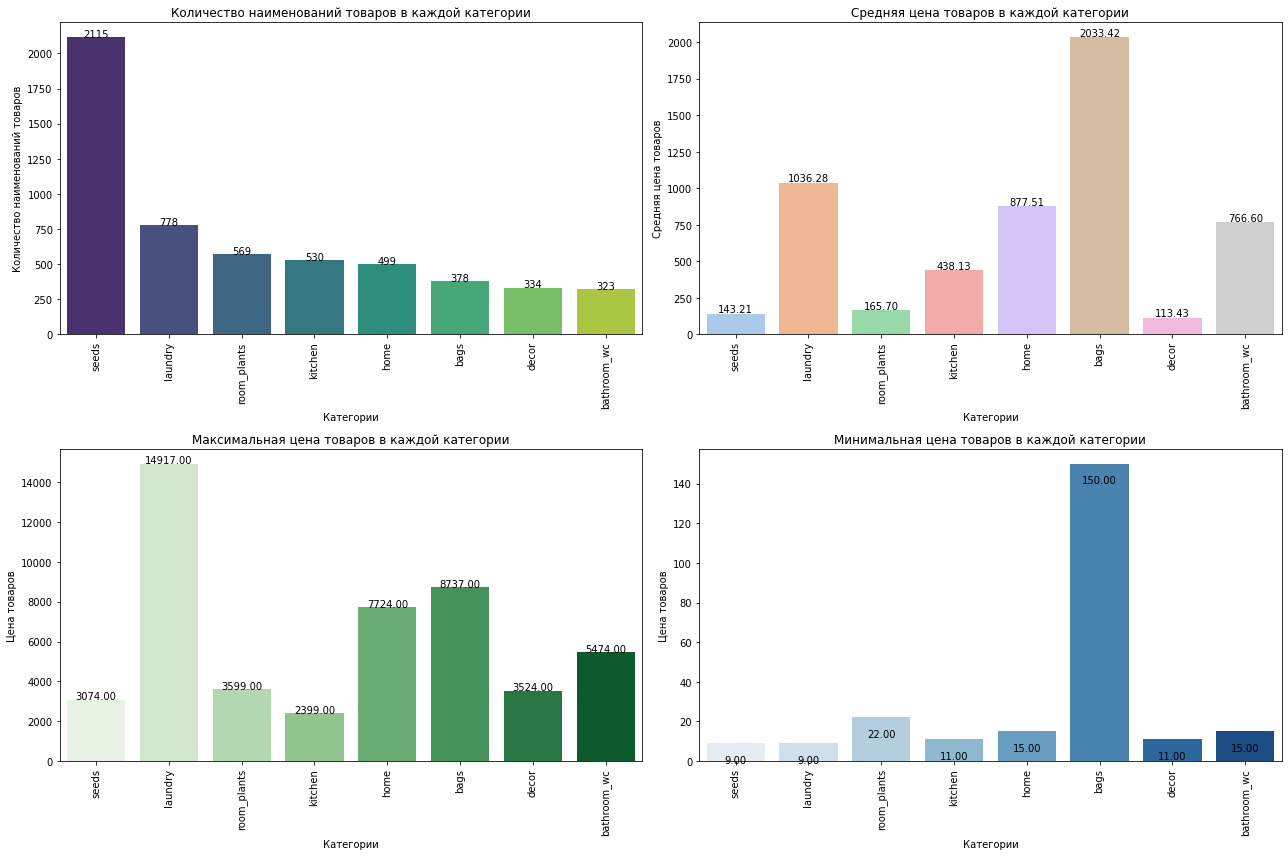

In [41]:
category_counts = data_cleaned['category'].value_counts()
category_means = data_cleaned.groupby('category')['price'].mean().round(2).reindex(category_counts.index)
max_prices = data_cleaned.groupby('category')['price'].max().reindex(category_counts.index)
min_prices = data_cleaned.groupby('category')['price'].min().reindex(category_counts.index)

fig, axes = plt.subplots(2, 2, figsize=(18, 12))

sns.barplot(ax=axes[0, 0], x=category_counts.index, y=category_counts.values, palette='viridis')
axes[0, 0].set_title('Количество наименований товаров в каждой категории')
axes[0, 0].set_xlabel('Категории')
axes[0, 0].set_ylabel('Количество наименований товаров')
axes[0, 0].set_xticklabels(category_counts.index, rotation=90)


for index, value in enumerate(category_counts):
    axes[0, 0].text(index, value + 0.5, str(value), ha='center', fontsize=10)


sns.barplot(ax=axes[0, 1], x=category_means.index, y=category_means.values, palette='pastel')
axes[0, 1].set_title('Средняя цена товаров в каждой категории')
axes[0, 1].set_xlabel('Категории')
axes[0, 1].set_ylabel('Средняя цена товаров')
axes[0, 1].set_xticklabels(category_means.index, rotation=90)


for index, value in enumerate(category_means):
    axes[0, 1].text(index, value + 10, f'{value:.2f}', ha='center', fontsize=10)


sns.barplot(ax=axes[1, 0], x=max_prices.index, y=max_prices.values, palette='Greens')
axes[1, 0].set_title('Максимальная цена товаров в каждой категории')
axes[1, 0].set_xlabel('Категории')
axes[1, 0].set_ylabel('Цена товаров')
axes[1, 0].set_xticklabels(max_prices.index, rotation=90)


for index, value in enumerate(max_prices):
    axes[1, 0].text(index, value + 10, f'{value:.2f}', ha='center', fontsize=10)


sns.barplot(ax=axes[1, 1], x=min_prices.index, y=min_prices.values, palette='Blues')
axes[1, 1].set_title('Минимальная цена товаров в каждой категории')
axes[1, 1].set_xlabel('Категории')
axes[1, 1].set_ylabel('Цена товаров')
axes[1, 1].set_xticklabels(min_prices.index, rotation=90)


for index, value in enumerate(min_prices):
    axes[1, 1].text(index, value - 10, f'{value:.2f}', ha='center', fontsize=10)

plt.tight_layout() 
plt.show()

In [42]:
filtered_data = data_cleaned.query('category == "seeds" ')
filtered_data.head(50)

,date,customer_id,order_id,product,quantity,price,day_date,month,total_price,category
2,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,радермахера d-12 см h-20 см,1,112.0,2018-10-01,2018-10,112.0,seeds
3,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,хризолидокарпус лутесценс d-9 см,1,179.0,2018-10-01,2018-10,179.0,seeds
4,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,циперус зумула d-12 см h-25 см,1,112.0,2018-10-01,2018-10,112.0,seeds
5,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,шеффлера лузеана d-9 см,1,164.0,2018-10-01,2018-10,164.0,seeds
6,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,юкка нитчатая d-12 см h-25-35 см,1,134.0,2018-10-01,2018-10,134.0,seeds
22,2018-10-02 11:00:00,f08d9018-438e-4e96-b519-f74c0302a433,14480,многолетнее растение тимьян-чабрец розовый объ...,1,89.0,2018-10-02,2018-10,89.0,seeds
50,2018-10-02 15:00:00,4d93d3f6-8b24-403b-a74b-f5173e40d7db,68506,герань домашняя (пеларгония зональная) цветуща...,11,142.0,2018-10-02,2018-10,1562.0,seeds
52,2018-10-02 17:00:00,49b9c587-c19e-4481-bace-967aeac357fa,14481,пеларгония зональная диам. 12 см малиновая с к...,1,150.0,2018-10-02,2018-10,150.0,seeds
53,2018-10-02 17:00:00,49b9c587-c19e-4481-bace-967aeac357fa,14481,пеларгония зональная диам. 12 см сиренево-крас...,1,150.0,2018-10-02,2018-10,150.0,seeds
54,2018-10-02 17:00:00,49b9c587-c19e-4481-bace-967aeac357fa,14481,пеларгония зональная диам. 12 см сиреневый пол...,1,150.0,2018-10-02,2018-10,150.0,seeds


**Вывод**

В результате предобработки был осуществлен поиск дубликатов. 
Были найдены дубликаты, возникшие из-за "технической ошибки". Количество удалённых строк в результате этой ошибки составило 1948 или 26.06%.

Были созданы дополнительные столбцы для использования в последующем анализе:
- `month` - месяц заказа;
- `total_price` - общая цена позиции в заказе (произведение количества и цены единицы товара).
    
Были созданы 8 уникальных категорий товаров:
- `seeds` - рассада и семена;
- `laundry` - товары для стирки и постельное белье;              
- `room_plants` - комнатные растения;
- `kitchen` - товары для кухни;
- `home` - товары для дома и дачи;
- `bags` - сумки;
- `bathroom_wc` - товары для ванной и туалета;
- `decor` - декор для дома (пластиковые фрукты, растения, новогодние елки).
    
По ассортименту (количеству позиций) лидирует категория `seeds` - 2115 товарных позиций. Далее следуют категория `laundry` - 778 товарных позиций и `room_plants` - 558 товарных позиций. Наименьшими являются категории `bathroom_wc` и `decor`.

## Исследовательский анализ данных (портрет потребителя)<a id="final3"></a> 

### Общие характеристики клиентов<a id="final3_1"></a>  

**Общие характеристики покупателей:**

- **Число уникальных покупателей:** количество уникальных `customer_id`.
- **Частота покупок:** определение, сколько раз каждый клиент совершал покупки (количество заказов по `order_id`).
- **Среднее количество покупок на клиента:** расчет среднего количества заказов на каждого клиента.
- **Средний чек:** расчет среднего значения `total_price` на одного клиента.

In [43]:
data_cleaned.describe()

,order_id,quantity,price,total_price
count,5526.000000,5526.000000,5526.000000,5526.000000
mean,55967.862287,2.589034,529.790098,830.087661
std,32479.873585,16.511703,971.452225,9220.795388
min,12624.000000,1.000000,9.000000,9.000000
25%,14810.000000,1.000000,90.000000,120.000000
50%,69199.000000,1.000000,150.000000,190.000000
75%,71936.750000,1.000000,524.000000,734.000000
max,112789.000000,1000.000000,14917.000000,675000.000000


In [44]:
unique_customers = data_cleaned['customer_id'].nunique()
print ('кол-во уникальных покупателей', unique_customers, 'человек')

кол-во уникальных покупателей 2432 человек


In [45]:
unique_orders = data_cleaned['order_id'].nunique()
print ('кол-во уникальных заказов', unique_orders)

кол-во уникальных заказов 3499


In [46]:
unique_orders_by_customer = unique_orders/unique_customers
print ('среднее кол-во заказов на 1 покупателя', round((unique_orders_by_customer),1))

среднее кол-во заказов на 1 покупателя 1.4


In [47]:
average_order_value = data_cleaned['price'].mean()
print ('средняя цена', round((average_order_value),2), 'руб')

средняя цена 529.79 руб


In [48]:
average_check_by_category = data_cleaned.groupby('category')['price'].mean().reset_index()
print ('средняя цена в разрезе категорий', average_check_by_category)

средняя цена в разрезе категорий       category        price
0         bags  2033.417328
1  bathroom_wc   766.595975
2        decor   113.432136
3         home   877.508684
4      kitchen   438.133962
5      laundry  1036.279991
6  room_plants   165.695079
7        seeds   143.213869


In [49]:
min_check_by_category = data_cleaned.groupby('category')['price'].min().reset_index()
print ('минимальная цена в разрезе категорий', min_check_by_category)

минимальная цена в разрезе категорий       category  price
0         bags  150.0
1  bathroom_wc   15.0
2        decor   11.0
3         home   15.0
4      kitchen   11.0
5      laundry    9.0
6  room_plants   22.0
7        seeds    9.0


In [50]:
ma_check_by_category = data_cleaned.groupby('category')['price'].max().reset_index()
print ('минимальная цена в разрезе категорий', ma_check_by_category)

минимальная цена в разрезе категорий       category    price
0         bags   8737.0
1  bathroom_wc   5474.0
2        decor   3524.0
3         home   7724.0
4      kitchen   2399.0
5      laundry  14917.0
6  room_plants   3599.0
7        seeds   3074.0


### Топ 5 продаж товаров и топ 5 продаж в каждой категории<a id="final3_2"></a>     

**Топ-5 продаж:**

- **Общие продажи:** определите топ-5 самых продаваемых товаров по `total_price` и по количеству (`quantity`).
- **Топ-5 продаж по категориям:** для каждой категории товаров выделите топ-5 товаров.


In [51]:
def summarize_top_5(data, category):
     top_5_products_price = data[data['category'] == category] \
        .groupby('product')['total_price'] \
        .sum() \
        .nlargest(5) \
        .reset_index()

    
    absolute_counts_price = top_5_products_price.rename(columns={'total_price': 'продажи'})
    
    
    total_sum_price = absolute_counts_price['продажи'].sum()
    relative_counts_price = (absolute_counts_price['продажи'] / total_sum_price).rename('% от продаж в топ').reset_index(drop=True)

    
    result_table_price = absolute_counts_price.join(relative_counts_price).style.background_gradient(cmap='Blues')
    result_table_price = result_table_price.format({'продажи': '{:.0f}', '% от продаж в топ': '{:.2%}'})

    
    top_5_products_quantity = data[data['category'] == category] \
        .groupby('product')['quantity'] \
        .sum() \
        .nlargest(5) \
        .reset_index()

    
    absolute_counts_quantity = top_5_products_quantity.rename(columns={'quantity': 'продажи_шт'})
    
    
    total_sum_quantity = absolute_counts_quantity['продажи_шт'].sum()
    relative_counts_quantity = (absolute_counts_quantity['продажи_шт'] / total_sum_quantity).rename('% от продаж в топ').reset_index(drop=True)

    
    result_table_quantity = absolute_counts_quantity.join(relative_counts_quantity).style.background_gradient(cmap='Blues')
    result_table_quantity = result_table_quantity.format({'продажи_шт': '{:.0f}', '% от продаж в топ': '{:.2%}'})

    return result_table_price, result_table_quantity



In [52]:
result_by_price_seeds, result_by_quantity_seeds  = summarize_top_5(data_cleaned, 'seeds')
result_by_price_laundry, result_by_quantity_laundry = summarize_top_5(data_cleaned, 'laundry')
result_by_price_room_plants, result_by_quantity_room_plants = summarize_top_5(data_cleaned, 'room_plants')
result_by_price_kitchen, result_by_quantity_kitchen = summarize_top_5(data_cleaned, 'kitchen')
result_by_price_home, result_by_quantity_home = summarize_top_5(data_cleaned, 'home')
result_by_price_bags, result_by_quantity_bags = summarize_top_5(data_cleaned, 'bags')
result_by_price_decor, result_by_quantity_decor = summarize_top_5(data_cleaned, 'decor')
result_by_price_bathroom_wc, result_by_quantity_bathroom_wc = summarize_top_5(data_cleaned, 'bathroom_wc')

In [53]:
result_by_price_seeds

,product,продажи,% от продаж в топ
0,спатифиллум шопен d-12 см,11512,21.58%
1,пеларгония розебудная red pandora укорененный черенок,10792,20.24%
2,пеларгония зональная диам. 12 см сиреневый полумахровый,10649,19.97%
3,пеларгония зональная диам. 12 см красная махровая,10514,19.71%
4,эвкалипт гунни d-17 см h-60 см,9866,18.50%


In [54]:
result_by_quantity_seeds

,product,продажи_шт,% от продаж в топ
0,пеларгония розебудная red pandora укорененный черенок,80,23.26%
1,однолетнее растение петуния махровая в кассете 4 шт россия,78,22.67%
2,пеларгония зональная диам. 12 см красная махровая,63,18.31%
3,пеларгония зональная диам. 12 см сиреневый полумахровый,62,18.02%
4,пеларгония розебудная prins nikolai укорененный черенок,61,17.73%


In [55]:
result_by_price_laundry

,product,продажи,% от продаж в топ
0,простынь вафельная 200х180 см wellness rw180-01 100% хлопок,53232,31.99%
1,вешалки мягкие для деликатных вещей 3 шт шоколад,49596,29.80%
2,сушилка meliconi stendy junior,27970,16.81%
3,гладильная доска sarayli new elegant 125x45 см,17843,10.72%
4,гладильная доска ника blues 124х46 см 5757,17786,10.69%


In [56]:
result_by_quantity_laundry

,product,продажи_шт,% от продаж в топ
0,вешалки мягкие для деликатных вещей 3 шт шоколад,335,53.26%
1,плечики пластмассовые размер 52 - 54 тула 1205158,160,25.44%
2,вешалка valiant для брюк и юбок металлическая 30*10.5 см 121b11,50,7.95%
3,вешалка-плечики без эссенции цвет тёмно-розовый fwm-002/quartz pink,47,7.47%
4,набор вешалок для костюма 45см 4шт цвет: кремовый attribute ahp224,37,5.88%


In [57]:
result_by_price_room_plants

,product,продажи,% от продаж в топ
0,афеляндра скуарроса дания микс в кашпо с автополивом,7048,35.13%
1,гортензия микс в кашпо с автополивом,3599,17.94%
2,подвесное кашпо дихондра серебристая объем 4 л,3416,17.03%
3,подвесное кашпо пеларгония махровая calliope dark red темно-красная объем 4 л,3000,14.95%
4,подвесное кашпо пеларгония махровая calliope rose splash розовая объем 4 л,3000,14.95%


In [58]:
result_by_quantity_room_plants

,product,продажи_шт,% от продаж в топ
0,рассада арбуза сорт огонек горшок 9х9 см p-9,29,29.59%
1,рассада арбуза сорт шуга бэби горшок 9х9 см p-9,24,24.49%
2,примула комнатная d9 см цвет в ассортименте,15,15.31%
3,рассада дыни сорт дина горшок 9х9 см p-9,15,15.31%
4,рассада зелени для кухни розмарин блю лагун диам. 9 см,15,15.31%


In [59]:
result_by_price_kitchen  

,product,продажи,% от продаж в топ
0,набор ножей attribute chef 5 предметов akf522,29248,40.24%
1,салфетка protec textil polyline 30х43 см аметист белая 6230,15700,21.60%
2,скатерть круглая d-175 см 50% полиэстер 50% хлопок белая wellness mld-187-эстель*01,11400,15.69%
3,скатерть 180 см wellness wtd180-лион*01 100% полиэстер,8832,12.15%
4,скатерть рим 88% полиэфир 12% хлопок прямоугольная 350х150 см голубая wellness mc355-рим*16,7496,10.31%


In [60]:
result_by_quantity_kitchen

,product,продажи_шт,% от продаж в топ
0,щетка для посуды *оля* мультипласт 1807010,101,23.43%
1,щетка для мытья посуды колибри м5202 большая,100,23.20%
2,универсальный нож webber из нержавеющей стали русские мотивы 127 см с деревянной ручкой ве-2252d,81,18.79%
3,салфетка protec textil polyline 30х43 см аметист белая 6230,80,18.56%
4,ковш пластмассовый полимербыт с215 15 л 1406006,69,16.01%


In [61]:
result_by_price_home

,product,продажи,% от продаж в топ
0,мусорный контейнер hailo bigbin swing 45 0845-010 45 л хром,27560,26.46%
1,"урна уличная ""гео"" hobbyka/хоббика 59*375см сталь",24370,23.40%
2,веник сорго с деревянной ручкой с 4-мя швами rozenbal r206204,20550,19.73%
3,коврик придверный attribute nature кокосовый 60x40 см amc015,17228,16.54%
4,автоматическая щетка leifheit для мытья окон с ручкой 43 см. 51114,14458,13.88%


In [62]:
result_by_quantity_home

,product,продажи_шт,% от продаж в топ
0,ручка-скоба рс-100 белая *трибатрон* 1108035,201,29.69%
1,крепеж для пружины дверной 1107055,170,25.11%
2,щетка-сметка 4-х рядная деревянная 300 мм (фигурная ручка) ворс 55 см 1801096,105,15.51%
3,стяжка оконная с болтом ст-55 цинк 1108354,101,14.92%
4,шпингалет 80 мм белый с пружиной 1102188,100,14.77%


In [63]:
result_by_price_bags

,product,продажи,% от продаж в топ
0,сумка-тележка 2-х колесная gimi argo синяя,48231,31.50%
1,тележка багажная delta тбр-22 синий грузоподъемность 20 кг сумка и 50 кг каркас россия,33992,22.20%
2,сумка-тележка хозяйственная andersen scala shopper plus lini синяя 133-108-90,28045,18.32%
3,сумка-тележка хозяйственная rolser imx006 bassi logic tour бордовая,23037,15.05%
4,сумка-тележка 2-х колесная складная gimi flexi зеленая,19788,12.93%


In [64]:
result_by_quantity_bags

,product,продажи_шт,% от продаж в топ
0,тележка багажная delta тбр-22 синий грузоподъемность 20 кг сумка и 50 кг каркас россия,59,39.33%
1,сумка-тележка 2-х колесная gimi argo синяя,45,30.00%
2,тележка багажная delta тбр-20 коричневый с оранжевым грузоподъемность 25 кг сумка и 50 кг каркас россия,17,11.33%
3,тележка багажная delta тбр-20 синий грузоподъемность 25 кг сумка и 50 кг каркас россия,17,11.33%
4,сумка-тележка 2-х колесная складная gimi flexi зеленая,12,8.00%


In [65]:
result_by_price_decor

,product,продажи,% от продаж в топ
0,муляж яблоко 9 см красное,32702,51.45%
1,муляж яблоко зеленый 9 см полиуретан,10492,16.51%
2,новогоднее дерево ель сербская d-21 см h-60 см,9441,14.85%
3,муляж банан желтый 21 см полиуретан,5831,9.17%
4,декоративная композиция искуственных цветов букет роз три цветка цвет в ассортименте 105 см,5096,8.02%


In [66]:
result_by_quantity_decor


,product,продажи_шт,% от продаж в топ
0,муляж яблоко 9 см красное,618,55.98%
1,муляж яблоко зеленый 9 см полиуретан,188,17.03%
2,муляж банан желтый 21 см полиуретан,109,9.87%
3,цветок искусственный гвоздика пластиковая одиночная в ассортименте 50 см,97,8.79%
4,муляж лимон желтый 9 см полиуретан,92,8.33%


In [67]:
result_by_price_bathroom_wc

,product,продажи,% от продаж в топ
0,вантуз с деревянной ручкой d14 см красный burstenmann 0522/0000,675000,94.73%
1,комплект для мытья полов из нержавеющей стали и пластика clean twist mop зеленый: швабра-моп + ведро 20 л с механизмом отжима l,10798,1.52%
2,швабра для мытья окон leifheit hausrein с телескоп. ручкой micro duo 51120,10496,1.47%
3,набор vileda easy wring & clean turbo 151153 в коробке швабра и ведро с педальным отжимом,8772,1.23%
4,бак для белья hailo 0744-221 44 л стальной,7498,1.05%


In [68]:
result_by_quantity_bathroom_wc 

,product,продажи_шт,% от продаж в топ
0,вантуз с деревянной ручкой d14 см красный burstenmann 0522/0000,1000,72.57%
1,пружина дверная 240 мм оцинкованная (д-19 мм) без крепления 1107014,150,10.89%
2,ёрш унитазный с деревянной ручкой ваир 1712012,103,7.47%
3,крепеж для пружины дверной оцинкованный 1107054,100,7.26%
4,карниз для ванной комнаты виолет раздвижной 280 см с кольцами белый 2810/6,25,1.81%


### Динамика продаж товаров в целом и по категориям<a id="final3_3"></a>   

**Динамика продаж:**

- **Динамика общей выручки:** посчитайте продажи на основании даты `date`.
- **Динамика по категориям:** аналогично, разбейте данные по категориям.

In [69]:
def plot_sales_by_category(data_cleaned):
    """
    Функция для визуализации продаж по категориям и общего объема продаж по месяцам.
    
    Параметры:
    data_cleaned (DataFrame): DataFrame с данными о продажах, который должен содержать
                               столбцы 'date', 'total_price' и 'category'.
    """
    
    
    min_year = data_cleaned['date'].dt.year.min()
    data_cleaned['month_number'] = (data_cleaned['date'].dt.year - min_year) * 12 + data_cleaned['date'].dt.month

    
    sales_by_category_month = data_cleaned.groupby(['month_number', 'category']).agg({'total_price': 'sum'}).reset_index()

    
    categories = sales_by_category_month['category'].unique()

    
    plt.figure(figsize=(20, 15))

    
    total_sales_by_month = data_cleaned.groupby('month_number')['total_price'].sum()

   
    for i, category in enumerate(categories):
        plt.subplot(4, 3, i + 1)  # 4 строки, 3 столбца для графиков
        category_data = sales_by_category_month[sales_by_category_month['category'] == category]

        # Создаем столбчатую диаграмму для текущей категории
        plt.bar(category_data['month_number'], category_data['total_price'], color='orange', label=category)
        plt.title(f'Продажи для категории {category}')  # Заголовок графика
        plt.xlabel('Месяц')  # Подпись для оси X
        plt.ylabel('Сумма продаж')  # Подпись для оси Y
        plt.xticks(ticks=category_data['month_number'], 
                   labels=['окт18', 'ноя18', 'дек18', 'янв19', 'фев19', 
                           'март19', 'апр19', 'май19', 'июн19', 'июл19', 
                           'авг19', 'сен19', 'окт19', 'ноя19', 'дек19', 'янв20'], 
                   rotation=90)  # Метки для оси X
        plt.grid(axis='y')  # Сетка по оси Y

    
    plt.subplot(4, 3, len(categories) + 1)
    plt.bar(total_sales_by_month.index, total_sales_by_month.values, color='green')

    
    plt.title('Общий объем продаж по месяцам')  
    plt.xlabel('Месяц')  
    plt.ylabel('Сумма продаж')  
    plt.xticks(ticks=total_sales_by_month.index, 
               labels=['окт18', 'ноя18', 'дек18', 'янв19', 'фев19', 
                       'март19', 'апр19', 'май19', 'июн19', 'июл19', 
                       'авг19', 'сен19', 'окт19', 'ноя19', 'дек19', 'янв20'], 
               rotation=90)  
    plt.grid(axis='y') 

    plt.tight_layout()  
    plt.show()  



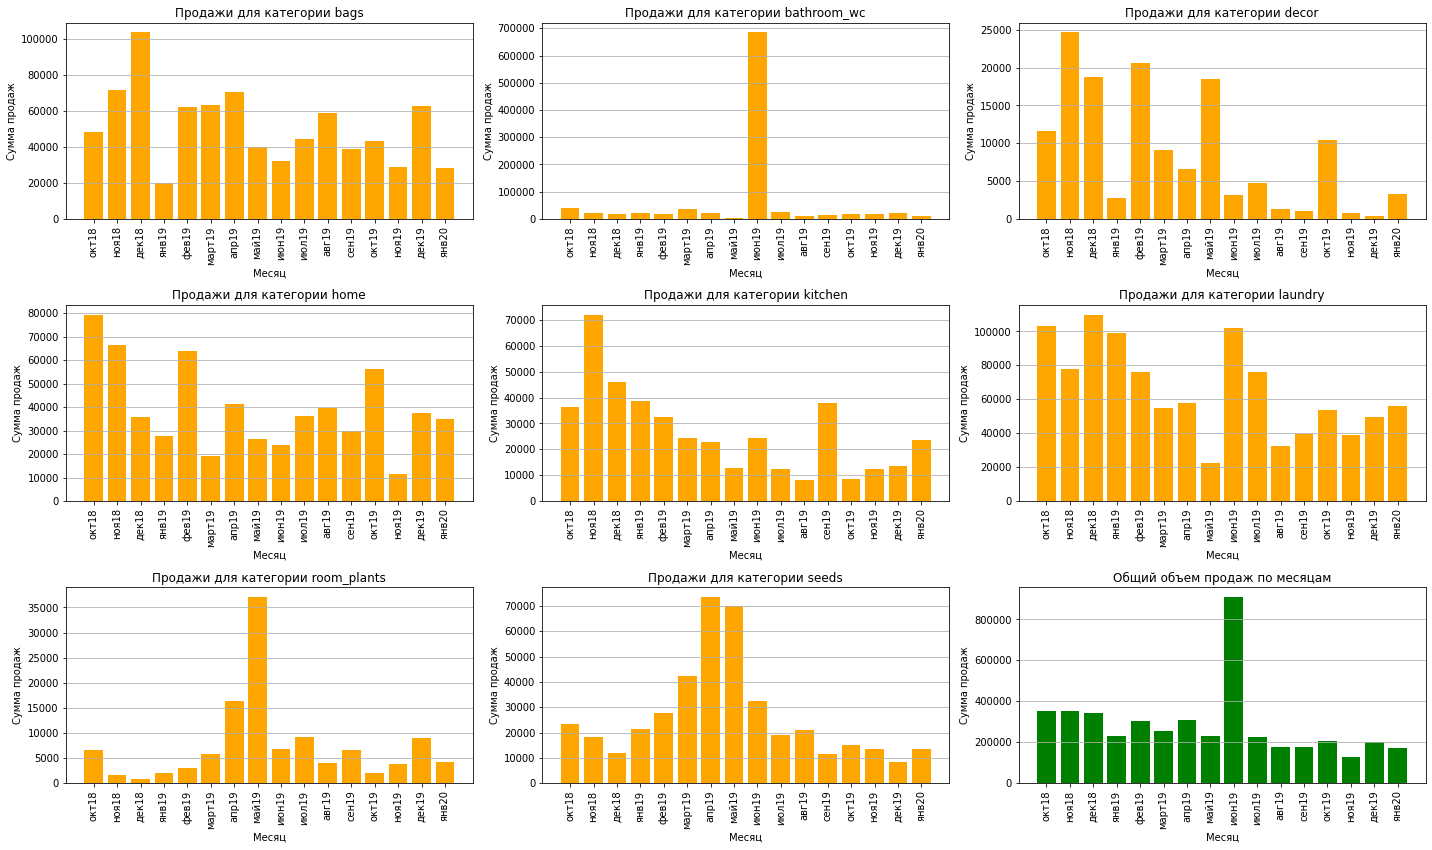

In [70]:
plot_sales_by_category(data_cleaned)

### Факты покупок в различных категориях товара <a id="final3_3_1"></a>   

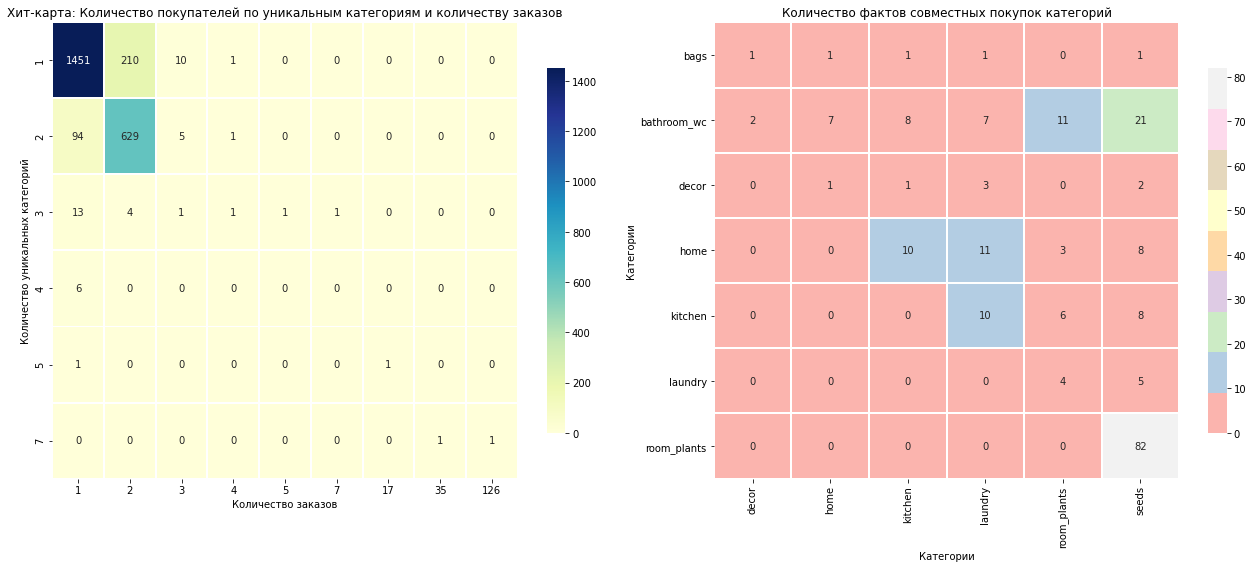

In [71]:
from itertools import combinations


category_count_per_customer = data_cleaned.groupby('customer_id')['category'].nunique().reset_index()
category_count_per_customer.columns = ['customer_id', 'unique_category_count']


order_count_per_customer = data_cleaned.groupby('customer_id')['order_id'].nunique().reset_index()
order_count_per_customer.columns = ['customer_id', 'order_count']


merged_data = pd.merge(category_count_per_customer, order_count_per_customer, on='customer_id')


heatmap_data = merged_data.pivot_table(index='unique_category_count', columns='order_count', 
                                        values='customer_id', aggfunc='count', fill_value=0)


orders_with_categories = data_cleaned.groupby('order_id')['category'].apply(list).reset_index()


co_occurrence_data = []

for categories in orders_with_categories['category']:
    for category1, category2 in combinations(sorted(set(categories)), 2):
        co_occurrence_data.append((category1, category2))


co_occurrence_df = pd.DataFrame(co_occurrence_data, columns=['category1', 'category2'])


co_occurrence_counts = pd.crosstab(co_occurrence_df['category1'], co_occurrence_df['category2'])


fig, axes = plt.subplots(1, 2, figsize=(18, 8))


sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, fmt='g', ax=axes[0], 
            linecolor='white', linewidth=1, cbar_kws={"shrink": .8})
axes[0].set_title('Хит-карта: Количество покупателей по уникальным категориям и количеству заказов')
axes[0].set_xlabel('Количество заказов')
axes[0].set_ylabel('Количество уникальных категорий')


sns.heatmap(co_occurrence_counts, cmap='Pastel1', annot=True, fmt='g', ax=axes[1], 
            linecolor='white', linewidth=1, cbar_kws={"shrink": .8})
axes[1].set_title('Количество фактов совместных покупок категорий')
axes[1].set_xlabel('Категории')
axes[1].set_ylabel('Категории')
axes[1].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()


### Точечные графики пол-ва заказов по пользователям и стоимостей заказа. Определение выбросов<a id="final3_4"></a> 

**Анализ заказов:**

- **Точечный график количества заказов по пользователям:**
  - Определение выбросов на основе формулы 95-го и 99-го персентилей.
- **Точечный график стоимости заказа на пользователя:**
  - Определение выбросов на основе формулы 95-го и 99-го персентилей.

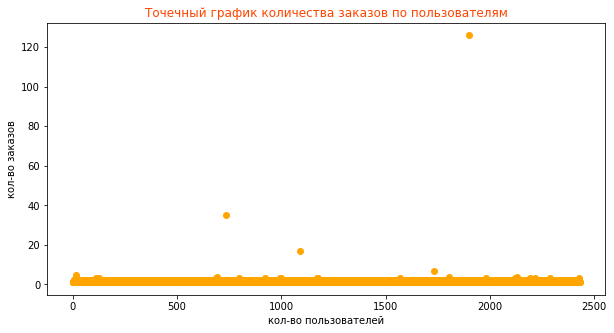

In [72]:

plt.figure(figsize=(10, 5)) 
ordersByUsers = (
   data_cleaned.groupby('customer_id', as_index=False)
    .agg({'order_id': 'nunique'})
)
ordersByUsers.columns = ['userId', 'orders']


x_values = pd.Series(range(0, len(ordersByUsers)))

x_values = pd.Series(range(0,len(ordersByUsers)))


plt.title('Точечный график количества заказов по пользователям', color='orangered');
plt.xlabel('кол-во пользователей', fontsize=10)  
plt.ylabel('кол-во заказов', fontsize=10);
plt.scatter(x_values, ordersByUsers['orders'],color = 'orange');

Точечный график наглядно показывает, как распределяются заказы между пользователями. Это позволяет сразу увидеть, есть ли выбросы или аномалии в данных.Так исходя из графика видно, что всего 4 пользователя делали заказы свыше 7 заказов

In [73]:
print(ordersByUsers.sort_values(by='orders', ascending=False).head(18))

                                    userId  orders
1902  c971fb21-d54c-4134-938f-16b62ee86d3b     126
736   4d93d3f6-8b24-403b-a74b-f5173e40d7db      35
1091  73d1cd35-5e5f-4629-8cf2-3fda829d4e58      17
1734  b7b865ab-0735-407f-8d0c-31f74d2806cc       7
17    0184f535-b60a-4914-a982-231e3f615206       5
2129  e0535076-6270-4df2-8621-cb06264a94fa       4
694   498f12a4-6a62-4725-8516-cf5dc9ab8a3a       4
1806  bea7a833-2074-42db-bc49-4457abd3c930       4
2426  ff422162-fc4a-4b65-a0e2-17f5095ea2c6       3
685   4856a2a7-b9d2-4243-b8d9-a96ec1425bbe       3
1001  6b0c6cfb-7717-4c34-8535-bbc6e2b2c758       3
2288  f163e581-59ba-4022-99db-e0973c7497c0       3
921   62952c5b-e5ef-4009-a2f9-1ebff401c514       3
1178  7d64b4ea-d03f-4c3a-b283-21b3d0d237f1       3
1173  7d0641a6-e043-487d-b356-38895fe7df84       3
2122  dfbcfde5-21de-4504-aff4-453e617d81c1       3
111   0adba506-249c-40b5-839d-a59d7a275cd7       3
129   0d1b15b6-9cf3-4642-8bc3-74c7dee7b40e       3


In [74]:
print(np.percentile(ordersByUsers['orders'], [95, 99])) 

[2. 2.]


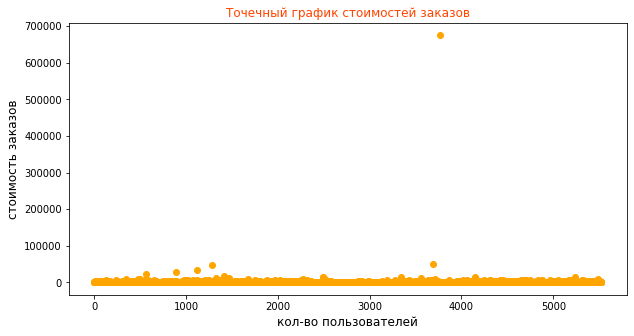

In [75]:
plt.figure(figsize=(10, 5)) 

x_values = pd.Series(range(0, len(data_cleaned['total_price'])))
plt.scatter(x_values, data_cleaned ['total_price'], color = 'orange') 

plt.title('Точечный график стоимостей заказов', color='orangered')
plt.xlabel('кол-во пользователей', fontsize=12)  
plt.ylabel('стоимость заказов', fontsize=12);

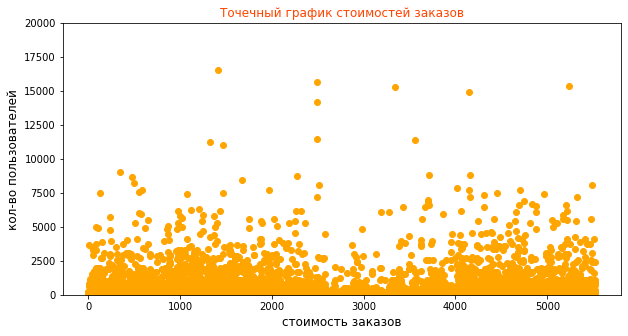

In [76]:
plt.figure(figsize=(10, 5)) 

x_values = pd.Series(range(0, len(data_cleaned['total_price'])))
plt.scatter(x_values, data_cleaned['total_price'], color = 'orange') 
plt.ylim(0, 20000)
# Установка названия графика
plt.title('Точечный график стоимостей заказов', color='orangered')
plt.xlabel('стоимость заказов', fontsize=12)  
plt.ylabel('кол-во пользователей', fontsize=12);

In [77]:
print(np.percentile(data_cleaned['total_price'], [90, 95, 99])) 

[1762.   2849.75 6149.  ]


In [78]:
data_cleaned[data_cleaned['total_price'] > 17500]['customer_id']

661     1b2764ad-9151-4051-a46a-9b01b62e6335
1023    8fba3604-ef57-4b9f-b2fe-3402fa8825c8
1299    6987e6d6-a63a-4ce2-a2d0-f424092d235e
1518    58a4c3cc-504f-43ea-a74a-bae19e665552
5071    146cd9bf-a95c-4afb-915b-5f6684b17444
5456    312e9a3e-5fca-43ff-a6a1-892d2b2d5ba6
Name: customer_id, dtype: object

### Вывод по разделу <a id="final3_5"></a>

**Портрет потребителя на основе предоставленных данных**

**1. Общее количество покупок и покупателей:**
- В базе данных зафиксировано 5558 заказов за период с октября 2018 по январь 2020. Среднее количество заказов на одного покупателя составляет 1.4. 95% пользователей заказывает не более 2 заказов. Это может означать, что большинство клиентов делают лишь один заказ, но некоторые могут заказывать несколько раз.
- Уникальных покупателей насчитывается 2451 человек, что свидетельствует о разнообразии клиентской базы.

**2. Структура расходов:**
- Средняя цена одного товара составляет 529.59 рублей, что подразумевает, что клиенты готовы тратить такие средства на продукцию, скорее всего, в среднем ценовом сегменте.
- 95% пользователей тратят на один заказ не более 2849.15 рублей, и лишь 99 процентов — 6149 рублей.
- Обширный разброс цен от 9 рублей до 14917 рублей указывает на наличие товаров как низкой, так и высокой ценовой категории.

**3. Категории товаров:**
- Наиболее популярные товары по категориям:
  - Сумки (средняя цена 2035.52 рублей)
  - Аксессуары для ванной (средняя цена 765.38 рублей)
  - Декор (средняя цена 112.14 рублей)
  - Товары для кухни (средняя цена 441.68 рублей)

**4. Самые продаваемые товары:**
- Топ продаж включает такие популярные продукты:
  - Семена (Пеларгония розебудная Red Pandora укорененный черенок: 82 штуки)
  - Аксессуары для дома (Вешалки мягкие для деликатных вещей (3 шт.) шоколад: 335 штук)
  - Растения (Рассада арбуза сорт Огонуек (горшок 9х9 см): 29 штук)
  - Товары для кухни (Щетка для посуды "Оля" мультипласт: 101 штук)
  - Категория "Дом и уют" (Ручка-скоба РС-100 белая "Трибатрон": 201 штук)
  - Товары для отпуска и перемещения (Тележка багажная Delta ТБР-22 синий: 59 штук)
  - Декор (Муляж яблока (9 см, красное): 32702 штук)
  - Сантехнические принадлежности (Вантуз с деревянной ручкой (d14 см, красный): 1000 штук)

**5. Кросс-продажи:**
- Главным образом покупатели делают 1 заказ с 1 категорией товара — 1451 заказ. 94 покупателя заказали 1 товар из 2 категорий, 13 покупателей — 1 заказ в 3 категориях. 210 покупателей сделали 2 заказа в 1 уникальных категории, 629 — 2 заказа в 2. Как видно, при росте количества заказов увеличивается и количество категорий.
- Среди покупателей, покупающих в нескольких категориях, больше всего фактов совместных покупок было для категорий семян и комнатных растений — 82 заказа, семян и средств для ванной — 21 заказ, 11 заказов по комбинации семян и товаров для стирки. По 10 заказов было зафиксировано для комбинаций: дом и кухня, кухня и стирка. То есть категории, которые чаще всего попадают в совместные покупки, это: семена, средства для ванны, средства для стирки, товары для дома и товары для кухни.

**6. Сезонность товара:**
- С октября 2018 года прослеживается тенденция к снижению общей величины продаж.
- Для категории семян наблюдается всплеск продаж в апреле и мае, аналогично для категории комнатных растений — в мае.
- Категория "Декор" (в которую входят искусственные новогодние елки) ожидает топ продаж в ноябре.
- Среди выручки лидируют категории товаров для стирки, сумок и тележек. Совсем небольшие объемы продаж дает категория комнатных растений и декора.

##  Кластеризация пользователей<a id="final3_5"></a> 

Применение моделей машинного обучения для кластеризации пользователей. Выбор модели машииного обучения.

### Отбор признаков для разработки модели<a id="final4_1"></a> 

 **Формирование датафрейма для обучения модели**

Для того чтобы выделить кластеры покупателей, которые делают много покупок, заказывают часто и тратят много денег, мы будем использовать данные, сгруппированные по следующим характеристикам:

- **Средний чек** (average check)
- **Количество уникальных товаров** (number of unique products)
- **Общее количество товаров** (total quantity)


In [79]:
data_cleaned.query ('customer_id == "c971fb21-d54c-4134-938f-16b62ee86d3b"').head(5)

,date,customer_id,order_id,product,quantity,price,day_date,month,total_price,category,month_number
9,2018-10-01 09:00:00,c971fb21-d54c-4134-938f-16b62ee86d3b,68480,чехол для гладильной доски colombo persia beig...,1,674.0,2018-10-01,2018-10,674.0,laundry,10
20,2018-10-02 08:00:00,c971fb21-d54c-4134-938f-16b62ee86d3b,68490,чехол для гладильной доски festival 137x60 см ...,1,1162.0,2018-10-02,2018-10,1162.0,laundry,10
64,2018-10-03 08:00:00,c971fb21-d54c-4134-938f-16b62ee86d3b,68511,набор прищепок большие пластиковые rozenbal пи...,10,86.0,2018-10-03,2018-10,860.0,home,10
65,2018-10-03 10:00:00,c971fb21-d54c-4134-938f-16b62ee86d3b,68514,сушилка для белья attribute прима 11 м синяя н...,1,749.0,2018-10-03,2018-10,749.0,laundry,10
130,2018-10-08 07:00:00,c971fb21-d54c-4134-938f-16b62ee86d3b,68561,тележка багажная delta тбр-20 коричневый с ора...,1,742.0,2018-10-08,2018-10,742.0,bags,10


In [80]:
data_cleaned.query ('customer_id == "1b2764ad-9151-4051-a46a-9b01b62e6335"')

,date,customer_id,order_id,product,quantity,price,day_date,month,total_price,category,month_number
661,2018-11-06 12:00:00,1b2764ad-9151-4051-a46a-9b01b62e6335,68878,"урна уличная ""гео"" hobbyka/хоббика 59*375см сталь",5,4874.0,2018-11-06,2018-11,24370.0,home,11


In [81]:
data_cleaned.query ('customer_id == "6987e6d6-a63a-4ce2-a2d0-f424092d235e"')

,date,customer_id,order_id,product,quantity,price,day_date,month,total_price,category,month_number
1299,2018-12-21 16:00:00,6987e6d6-a63a-4ce2-a2d0-f424092d235e,69504,тележка багажная delta тбр-22 синий грузоподъе...,57,574.0,2018-12-21,2018-12,32718.0,bags,12


In [82]:
data_cleaned[(data_cleaned['total_price'] > 100000)]

,date,customer_id,order_id,product,quantity,price,day_date,month,total_price,category,month_number
5456,2019-06-18 15:00:00,312e9a3e-5fca-43ff-a6a1-892d2b2d5ba6,71743,вантуз с деревянной ручкой d14 см красный burs...,1000,675.0,2019-06-18,2019-06,675000.0,bathroom_wc,18


In [83]:
grouped = data_cleaned.groupby('customer_id').agg(orders=('total_price', 'size'), total_sum=('total_price', 'sum'))


filtered_customers = grouped[(grouped['orders'] <= 3) & (grouped['total_sum'] <= 17500)].index
data_ml = data_cleaned[data_cleaned['customer_id'].isin(filtered_customers)]

In [84]:
customer_segments = data_ml.groupby('customer_id').agg(
    order_count = ('order_id', 'nunique'),
    sum_total_price=('total_price', 'sum'),
    avg_price=('price', 'mean'),
    count_product=('product', 'nunique'),
    count_quantity=('quantity', 'sum')
    ).reset_index()

In [85]:
customer_segments

,customer_id,order_count,sum_total_price,avg_price,count_product,count_quantity
0,001cee7f-0b29-4716-b202-0042213ab038,1,442.0,442.0,1,1
1,00299f34-5385-4d13-9aea-c80b81658e1b,1,914.0,457.0,1,2
2,002d4d3a-4a59-406b-86ec-c3314357e498,1,1649.0,1649.0,1,1
3,003bbd39-0000-41ff-b7f9-2ddaec152037,1,2324.0,1162.0,1,2
4,004d24e9-4a6c-4d0e-8727-8391dfd4b43a,1,1536.0,128.0,1,12
...,...,...,...,...,...,...
2207,ff601403-b094-4b86-9ac6-264d725b9277,2,1739.0,869.5,2,2
2208,ffaeab76-3a8d-49ee-860f-17273b2fc8a2,1,397.0,397.0,1,1
2209,ffb5976a-7a4d-460b-95c4-5ffaba31cb24,1,389.0,389.0,1,1
2210,ffb80538-3fda-4351-8ea9-9d2bec58bb07,1,974.0,974.0,1,1


In [86]:

agg_customer_stats = customer_segments.groupby('customer_id').agg(
    avg_order=('order_count', 'mean'),
    avg_total_price=('sum_total_price', 'mean'),
    avg_price=('avg_price', 'mean'),
    avg_product=('count_product', 'mean'),
    avg_quantity=('count_quantity', 'mean')
).reset_index()



In [87]:
agg_customer_stats

,customer_id,avg_order,avg_total_price,avg_price,avg_product,avg_quantity
0,001cee7f-0b29-4716-b202-0042213ab038,1,442.0,442.0,1,1
1,00299f34-5385-4d13-9aea-c80b81658e1b,1,914.0,457.0,1,2
2,002d4d3a-4a59-406b-86ec-c3314357e498,1,1649.0,1649.0,1,1
3,003bbd39-0000-41ff-b7f9-2ddaec152037,1,2324.0,1162.0,1,2
4,004d24e9-4a6c-4d0e-8727-8391dfd4b43a,1,1536.0,128.0,1,12
...,...,...,...,...,...,...
2207,ff601403-b094-4b86-9ac6-264d725b9277,2,1739.0,869.5,2,2
2208,ffaeab76-3a8d-49ee-860f-17273b2fc8a2,1,397.0,397.0,1,1
2209,ffb5976a-7a4d-460b-95c4-5ffaba31cb24,1,389.0,389.0,1,1
2210,ffb80538-3fda-4351-8ea9-9d2bec58bb07,1,974.0,974.0,1,1


### Стандартизирование данных<a id="final4_2"></a> 

**Построение матрицы расстояний и дендрограммы**

1. **Построение матрицы расстояний**:
   - Для создания матрицы расстояний используется функция `linkage()` на стандартизованной матрице признаков. Это позволит визуализировать, как близко расположены различные точки данных в многомерном пространстве и как они могут быть сгруппированы.

2. **Принятие решения о количестве кластеров**:
   - На основе анализа дендрограммы и метода локтя принимается решение о количестве кластеров. Оптимальное количество кластеров должно обеспечивать хорошую сегментацию покупателей, позволяя эффективно выявлять группы с похожими покупательскими паттернами.

In [88]:
customer_segments
X = agg_customer_stats[['avg_order', 'avg_total_price', 'avg_price', 'avg_product', 'avg_quantity']]

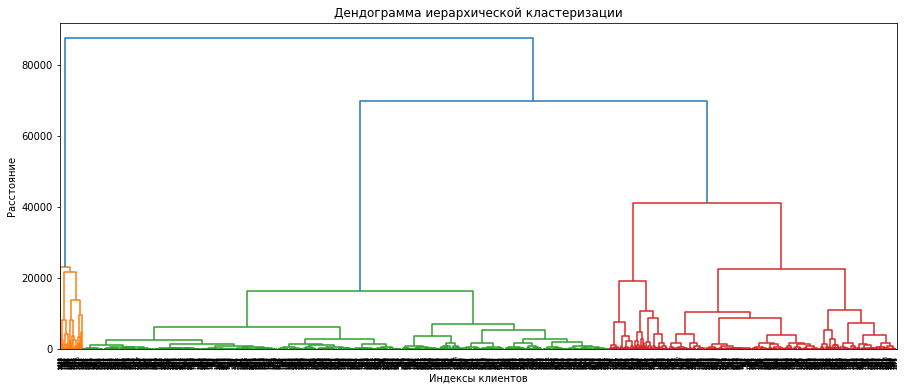

In [89]:
scaler = StandardScaler()  
X_st = scaler.fit_transform(X)  


Z = linkage(X, method='ward')


plt.figure(figsize=(15, 6))
dendrogram(Z)
plt.title('Дендограмма иерархической кластеризации')
plt.xlabel('Индексы клиентов')
plt.ylabel('Расстояние')
plt.show()

### Модель кластеризации на основании алгоритма K-Means<a id="final4_3"></a> 

In [90]:
km = KMeans(n_clusters = 3, random_state = 0)
labels = km.fit_predict(X_st)
agg_customer_stats['cluster_km'] = labels

### Определение характеристик кластеров<a id="final4_4"></a> 

**Анализ кластеров**

1. **Средние значения для кластеров**:
   - Для каждого кластера вычисляются средние значения по ключевым признакам. Это даст возможность оценить характеристики покупателей в каждом кластере и понять, как они отличаются друг от друга.

2. **Распределение признаков для кластеров**:
   - Анализируется распределение признаков для различных кластеров. Это может включать визуализацию, такую как гистограммы или коробчатые диаграммы, чтобы увидеть, как распределяются данные в каждом кластере.

3. **Преобразование столбца `category` в бинарные признаки**:
   - Столбец `category`, содержащий категории товаров, преобразуется в несколько бинарных (dummy) признаков. Для каждого уникального значения в этом столбце создается новый бинарный признак, указывающий, принадлежит ли конкретный товар к данной категории.

4. **Описание кластеров с учетом бинарных столбцов**:
   - На основе преобразованных бинарных признаков создается общее описание каждого кластера. Это включает в себя не только средние значения, но и информацию о том, как часто встречаются товары из разных категорий в каждом кластере, что позволит глубже понять поведение покупателей.

In [91]:
agg_customer = agg_customer_stats
agg_customer_stats.drop(['customer_id'], axis = 1).groupby('cluster_km').mean()

,avg_order,avg_total_price,avg_price,avg_product,avg_quantity
cluster_km,,,,,
0,1.000817,849.421569,509.045752,1.062092,4.356209
1,1.401163,5692.709302,3422.373062,1.424419,8.901163
2,1.939951,1271.895118,586.327870,2.045343,2.783088


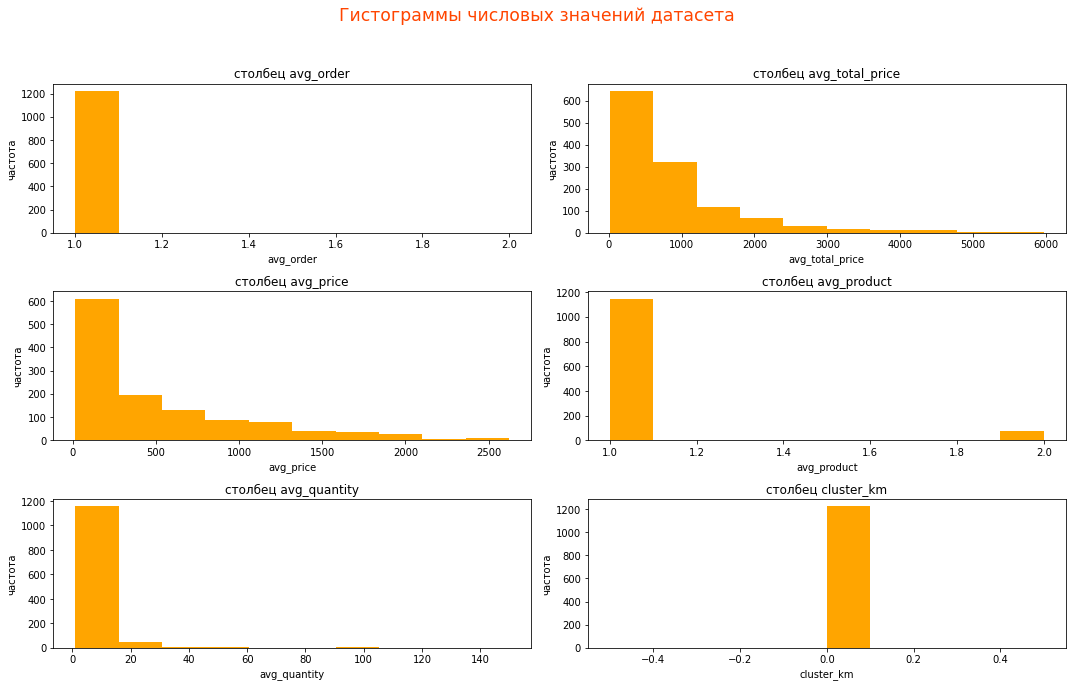

In [92]:
plot_histograms(agg_customer[agg_customer['cluster_km']==0])


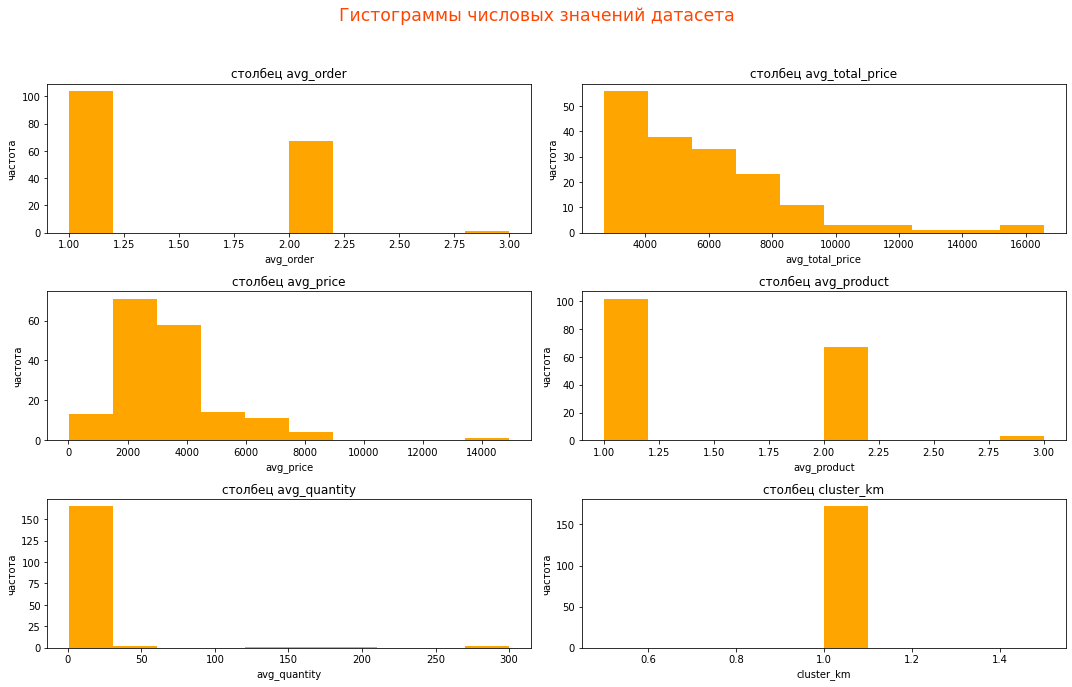

In [93]:
plot_histograms(agg_customer[agg_customer['cluster_km']==1])

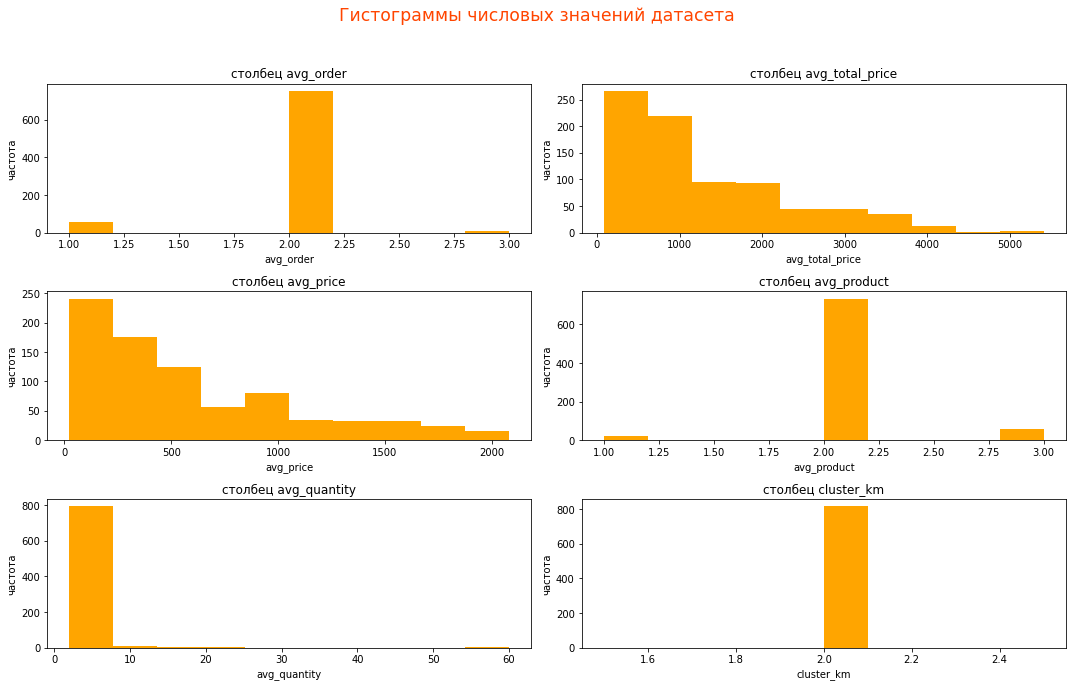

In [94]:
plot_histograms(agg_customer[agg_customer['cluster_km']==2])

In [96]:
data_cleaned_with_cluster = data_ml.merge(
    agg_customer[['customer_id', 'cluster_km']],  # Выбираем только нужные столбцы
    on='customer_id',  # Объединение по столбцу customer_id
    how='left' 
)


In [97]:
cluster0 = data_cleaned_with_cluster[data_cleaned_with_cluster['cluster_km'] == 0]
cluster1 = data_cleaned_with_cluster[data_cleaned_with_cluster['cluster_km'] == 1]
cluster2 = data_cleaned_with_cluster[data_cleaned_with_cluster['cluster_km'] == 2]

In [98]:
unique_customers_cluster0 = cluster0['customer_id'].nunique()
unique_customers_cluster1 = cluster1['customer_id'].nunique()
unique_customers_cluster2 = cluster2['customer_id'].nunique()


print(f"Уникальное количество customer_id в Cluster 0: {unique_customers_cluster0}")
print(f"Уникальное количество customer_id в Cluster 1: {unique_customers_cluster1}")
print(f"Уникальное количество customer_id в Cluster 2: {unique_customers_cluster2}")

Уникальное количество customer_id в Cluster 0: 1224
Уникальное количество customer_id в Cluster 1: 172
Уникальное количество customer_id в Cluster 2: 816


In [99]:
def evaluate_category_popularity(data_cleaned, cluster_number):
    
    
    category_counts = data_cleaned['category'].value_counts()

    
    category_means = data_cleaned.groupby('category')['price'].mean().round(2).reindex(category_counts.index)

    
    fig, axes = plt.subplots(1, 2, figsize=(16, 8))

    
    plt.suptitle(f'Структура продаж в кластере {cluster_number}', fontsize=16)

    
    sns.barplot(ax=axes[0], x=category_counts.index, y=category_counts.values, palette='viridis')
    axes[0].set_title('Количество наименований товаров в каждой категории')
    axes[0].set_xlabel('Категории')
    axes[0].set_ylabel('Количество наименований товаров')
    axes[0].set_xticklabels(category_counts.index, rotation=90)

    
    for index, value in enumerate(category_counts):
        axes[0].text(index, value + 0.5, str(value), ha='center', fontsize=10)

    
    sns.barplot(ax=axes[1], x=category_means.index, y=category_means.values, palette='pastel')
    axes[1].set_title('Средняя цена товаров в каждой категории')
    axes[1].set_xlabel('Категории')
    axes[1].set_ylabel('Средняя цена товаров')
    axes[1].set_xticklabels(category_means.index, rotation=90)

    
    for index, value in enumerate(category_means):
        axes[1].text(index, value + 10, f'{value:.2f}', ha='center', fontsize=10)

    plt.tight_layout(rect=[0, 0, 1, 0.95])  # Для лучшего отображения графиков и подгонка заголовка
    plt.show()



In [100]:
def plot_sales_trends(data, categories):
    """
    Функция для построения графиков трендов продаж по кластерам и категориям товаров.

    :param data: DataFrame с данными о продажах, включая кластеры, категории, месяцы и суммы продаж.
    :param categories: Список категорий для анализа.
    """


    sales_by_cluster = data.groupby(['cluster_km', 'category', 'month']).agg({'total_price': 'sum'}).reset_index()


    sales_by_cluster['month'] = sales_by_cluster['month'].astype(str)


    clusters = sales_by_cluster['cluster_km'].unique()

 
    plt.figure(figsize=(15, 10))

    for cluster in clusters:
        plt.figure(figsize=(15, 7))  
        cluster_data = sales_by_cluster[sales_by_cluster['cluster_km'] == cluster]

        for category in categories:
            category_data = cluster_data[cluster_data['category'] == category]
            if not category_data.empty:
                plt.plot(category_data['month'], category_data['total_price'], marker='o', label=category)

        
        plt.title(f'Динамика продаж по кластеру {cluster}', fontsize=16)
        plt.xlabel('Месяц', fontsize=14)
        plt.ylabel('Сумма продаж', fontsize=14)
        plt.xticks(rotation=90)  
        plt.legend(title='Категории')
        plt.grid(axis='y') 
        plt.tight_layout()  
        plt.show()  

In [101]:
def get_popular_products(data, categories, price_limit):
        
    results = []  

    for category in categories:
        category_data = data[data['category'] == category]
         
        affordable_products = category_data[category_data['price'] < price_limit]
        
        top_products = affordable_products.sort_values(by='total_price', ascending=False).head(2)
        
        results.append(top_products[['product', 'price', 'category']])  
        
    final_results = pd.concat(results, ignore_index=True)
    return final_results


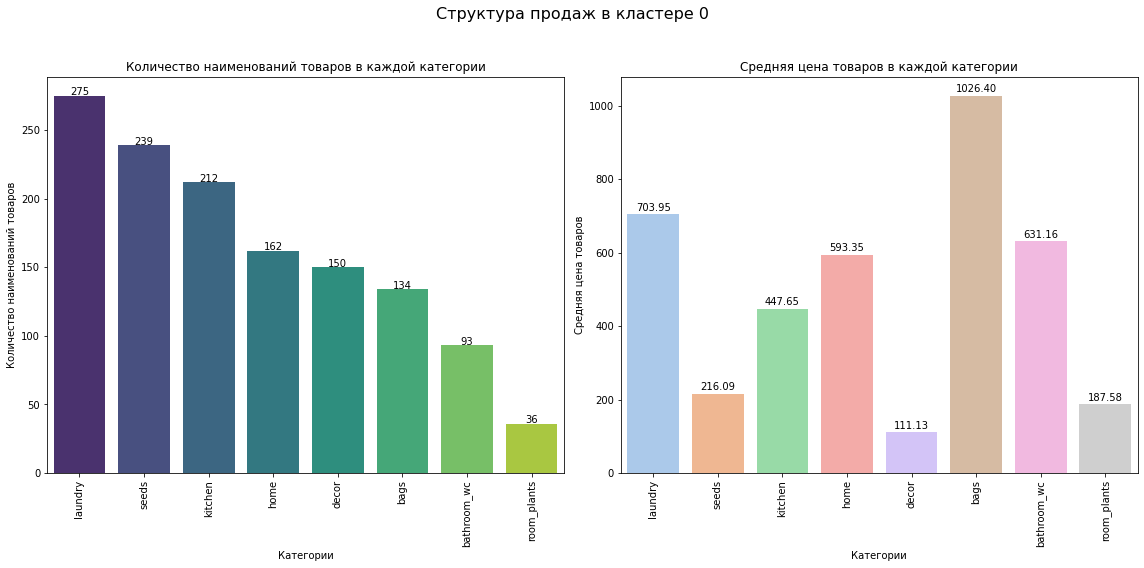

<Figure size 1080x720 with 0 Axes>

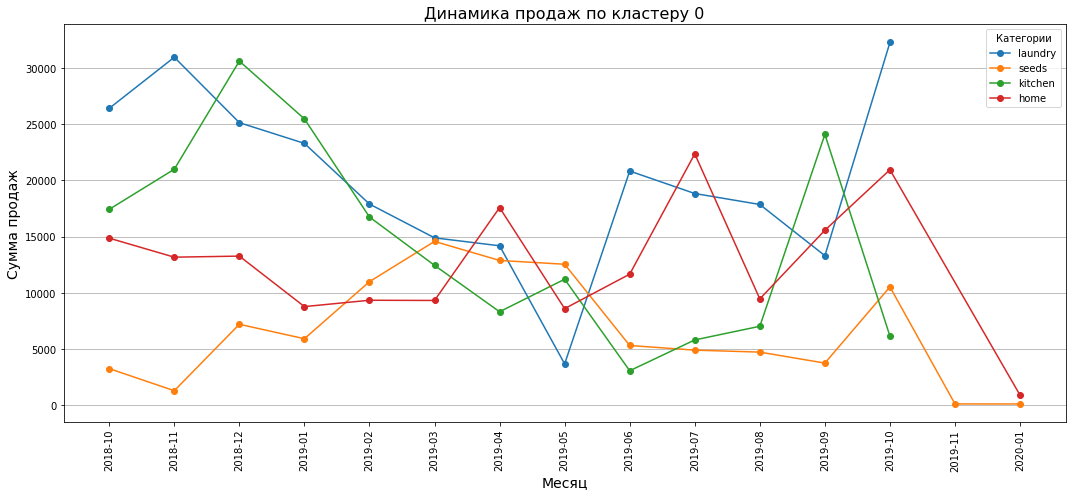

In [102]:
evaluate_category_popularity(cluster0, 0)
plot_sales_trends(cluster0, ['laundry', 'seeds', 'kitchen', 'home'])


In [103]:
popular_products_table1 = get_popular_products(cluster0, ['kitchen', 'home', 'laundry', 'seeds'], 510)
popular_products_table1

,product,price,category
0,кружка с трубочкой attribute мяч 500 мл jar501,76.0,kitchen
1,ковш пластмассовый полимербыт с215 15 л 1406006,64.0,kitchen
2,коврик придверный attribute nature кокосовый 6...,314.0,home
3,шпингалет 80 мм белый с пружиной 1102188,44.0,home
4,набор вешалок мягких тканевых с перекладиной и...,398.0,laundry
5,вешалка valiant для брюк и юбок металлическая ...,94.0,laundry
6,роза одноголовая тоффи 70 см эквадор плантация...,157.0,seeds
7,эпипремнум ауреум d-12 см,235.0,seeds


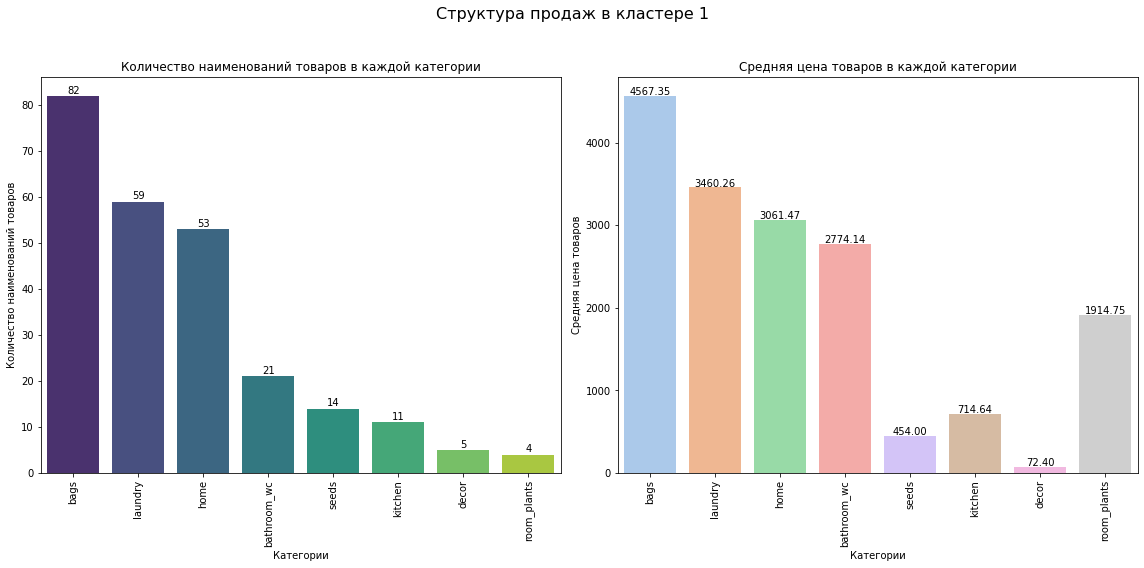

<Figure size 1080x720 with 0 Axes>

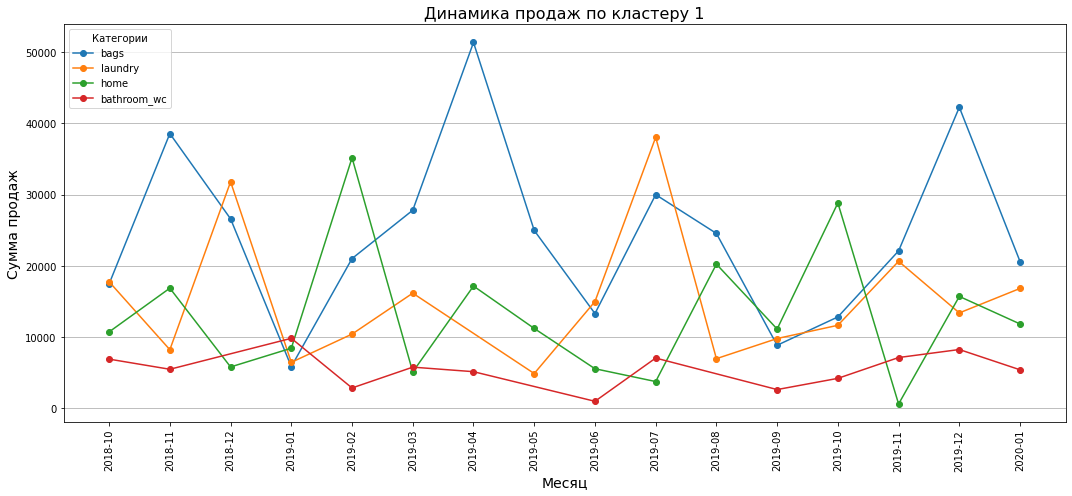

In [104]:
evaluate_category_popularity(cluster1, 1)
plot_sales_trends(cluster1, ['bags','laundry', 'home', 'bathroom_wc'])
filtered_data = cluster1[(cluster1['category'] == 'bags') & (cluster1['price'] >= 3422)]
top_products = filtered_data.sort_values(by='total_price', ascending=False).head(2)


In [105]:
popular_products_table2 = get_popular_products(cluster1, ['kitchen', 'home', 'laundry', 'seed'], 3423)
popular_products_table2


,product,price,category
0,скатерть рим 88% полиэфир 12% хлопок прямоугол...,1874.0,kitchen
1,модульная стеклянная банка 11л 298264 brabantia,825.0,kitchen
2,веник сорго с деревянной ручкой с 4-мя швами r...,550.0,home
3,коврик придверный attribute nature кокосовый 6...,286.0,home
4,чехол для гладильной доски attribute metal 140...,787.0,laundry
5,набор вешалок для костюма 45см 4шт цвет: кремо...,202.0,laundry


In [106]:
display(top_products[['product', 'price']])

,product,price
2962,сумка-тележка хозяйственная rolser imx006 bass...,7679.0
1318,сумка-тележка хозяйственная andersen royal sho...,8737.0


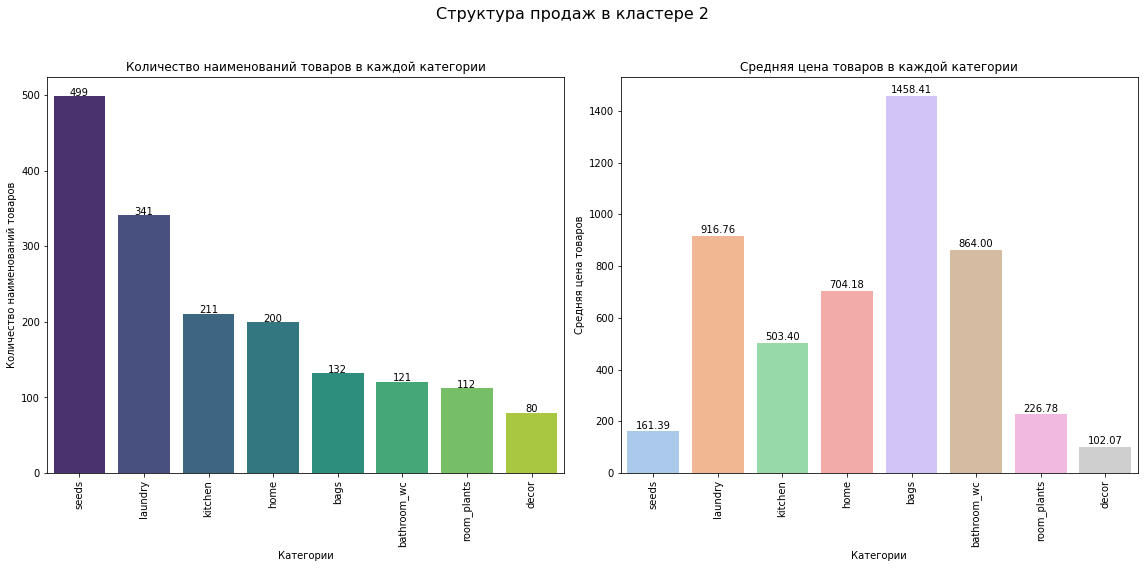

<Figure size 1080x720 with 0 Axes>

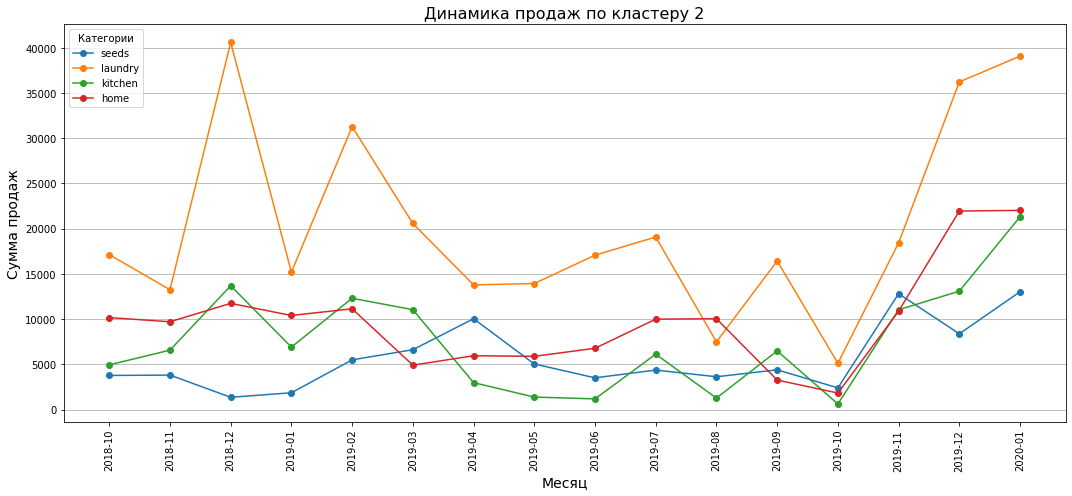

In [107]:
evaluate_category_popularity(cluster2, 2)
plot_sales_trends(cluster2, ['seeds','laundry', 'kitchen', 'home'])

In [108]:
popular_products_table2 = get_popular_products(cluster2, ['kitchen', 'home', 'laundry', 'seeds'], 1271)
popular_products_table2

,product,price,category
0,тарелка суповая luminarc океан эклипс 205 см l...,82.0,kitchen
1,тарелка обеденная luminarc океан эклипс 24 см ...,82.0,kitchen
2,кофр для хранения hausmann подкроватный 80х40х...,285.0,home
3,таз пластмассовый 80 л пищевой (минеральные во...,115.0,home
4,гладильная доска ника дсп эконом 1065х29 эк1,449.0,laundry
5,сушилка для белья потолочная лиана 24 м 1703011,734.0,laundry
6,антуриум андрианум многоцветковый красный d-12 см,922.0,seeds
7,мединилла магнифика d-17 см h-60 см,1034.0,seeds



### Вывод по разделу<a id="final4_5"></a>

### Описание кластеров

<span style="color: red; font-size: larger;">**Кластер 0: Мало и дешево**</span> 
- **avg_order**: 1.01 - низкая частота покупок.
- **avg_total_price**: 849.42 - средний чек средний, но не высокий.
- **avg_price**: 509.05 - достаточно доступные цены.
- **avg_product**: 1.0621 - покупают очень немного товаров в одном заказе.
- **avg_quantity**: 4.36 - покупают много по количеству, но это может означать наличие нескольких дешевых товаров.

---

<span style="color: red; font-size: larger;">**Кластер 1: Много и дорого**</span> 
- **avg_order**: 1.4012 - средняя частота покупок.
- **avg_total_price**: 5692.71 - высокий средний чек.
- **avg_price**: 3422.37 - достаточно дорогие товары.
- **avg_product**: 1.4244 - покупают почти два товара на заказ.
- **avg_quantity**: 8.9012 - большое количество товаров в заказе.

---

<span style="color: red; font-size: larger;">**Кластер 2: Много и дешево**</span> 
- **avg_order**: 1.9299 - низкая частота покупок.
- **avg_total_price**: 1271.9 - высокий средний чек.
- **avg_price**: 586.33 - дорогие товары.
- **avg_product**: 2.0453 - покупают немного товаров в одном заказе.
- **avg_quantity**: 2.7831 - покупают в небольшом количестве.

## Проверка гипотез о значиости средних в различных кластерах

###  Формулировка статистической гипотезы

**Гипотеза 1:**
Средний чек (avg_total_price) в кластере 1 и кластере 0 различается.

- **Н0**: Средний чек в кластере 0 равен среднему чеку в кластере 1
- **Н1**: Средний чек в кластере 0 не равен среднему чеку в кластере 1.

---
**Гипотеза 2:**
Средний чек (avg_total_price) в кластере 1 и кластере 2 различается.

Соответственно статистические гипотезы:

- **Н0**: Средний чек по кластерам не различается
- **Н1**: Средний чек по кластерам различается

---
**Гипотеза 3:**
Средний чек (avg_total_price) в кластере 0 и кластере 2 различается.

- **Н0**: Средний чек в кластере 0 и кластере 2 имеют статистически значимые различия
- **Н1**: Средний чек в кластере 0 и кластере 2 не имеют статистически значимых различий

###  Определение p-value и альфа

**p-value** — это вероятность получения результата, который столь же экстремален или более экстремален, чем наблюдаемый, при условии, что нулевая гипотеза верна. Мы будем использовать p-value для проверки значимости наших гипотез.

**Уровень значимости (α)**: Обычно выбирается 0.05 (5%). Если p-value меньше этого значения, мы отклоняем нулевую гипотезу.


In [1]:
alpha = 0.05
n_tests = 3  
alpha_corrected = alpha / n_tests  

###  Выбор метода проведения теста

Для проверки гипотез о различиях средних между двумя группами (кластерами) можно использовать t-тест для независимых выборок.
Однако для того чтобы использовать t-test нужно убедится, что данные являются нормально распределены и гомоседадичны (однородность дисперсий в группах)
Для проверки нормальности можно использовать тест Шапиро-Уилка, а для проверки гомоскедастичности – тест Левена.

In [110]:
cluster_0_avg_total = agg_customer_stats[agg_customer_stats['cluster_km'] == 0]['avg_total_price']
cluster_1_avg_total = agg_customer_stats[agg_customer_stats['cluster_km'] == 1]['avg_total_price']
cluster_2_avg_total = agg_customer_stats[agg_customer_stats['cluster_km'] == 2]['avg_total_price']

In [111]:
shapiro_result_cluster_0 = shapiro(cluster_0_avg_total)
shapiro_result_cluster_1 = shapiro(cluster_1_avg_total)
shapiro_result_cluster_2 = shapiro(cluster_2_avg_total)

print(f"Кластер 0: статистика = {shapiro_result_cluster_0.statistic}, p-value = {shapiro_result_cluster_0.pvalue}")
print(f"Кластер 1: статистика = {shapiro_result_cluster_1.statistic}, p-value = {shapiro_result_cluster_1.pvalue}")
print(f"Кластер 2: статистика = {shapiro_result_cluster_2.statistic}, p-value = {shapiro_result_cluster_2.pvalue}")

levene_result_0_1 = levene(cluster_0_avg_total, cluster_1_avg_total)
levene_result_1_2 = levene(cluster_1_avg_total, cluster_2_avg_total)
levene_result_0_2 = levene(cluster_0_avg_total, cluster_2_avg_total)

print(f"Кластер 0 и 1: Статистика Левена: {levene_result_0_1.statistic}, p-value: {levene_result_0_1.pvalue}")
print(f"Кластер 1 и 2: Статистика Левена: {levene_result_1_2.statistic}, p-value: {levene_result_1_2.pvalue}")
print(f"Кластер 0 и 2: Статистика Левена: {levene_result_0_2.statistic}, p-value: {levene_result_0_2.pvalue}")

Кластер 0: статистика = 0.7915553450584412, p-value = 6.335894551600447e-37
Кластер 1: статистика = 0.8607577681541443, p-value = 1.7030449966926042e-11
Кластер 2: статистика = 0.8799417614936829, p-value = 1.3321858954635891e-24
Кластер 0 и 1: Статистика Левена: 306.9776586126888, p-value: 2.8467400878293553e-62
Кластер 1 и 2: Статистика Левена: 164.40541124487956, p-value: 6.405882168166905e-35
Кластер 0 и 2: Статистика Левена: 36.852748660792635, p-value: 1.5152972253323023e-09


<span style="color: red; font-size: larger;">**Результаты теста Шапиро-Уилка:**</span> 

**Кластер 0:**

      статистика теста  - 0.7915553450584412.
      p-value: 6.335894551600447e-37 - распределение данных в кластере 1 не является нормальным.
---
**Кластер 1:**
     
      статистика теста - 0.8607577681541443.
      p-value: 1.7030449966926042e-11  - распределение данных в кластере 1 не является нормальным.
---
**Кластер 2:**
     
      статистика теста  0.8799417614936829. 
      p-value = 1.3321858954635891e-24 распределение данных в кластере 2 не является нормальным.

<span style="color: red; font-size: larger;">**Результаты теста Левена:**</span> 


Это значение указывает на отклонение дисперсий между группами. Чем выше это значение, тем больше разница в дисперсиях между группами.

**Кластер 0 и 1:** 
  
       - Статистика Левена: 306.9776  указывает на значительное различие в дисперсиях между этими двумя кластерами.
       - p-value: 2.8467400878293553e-62 значительно меньше 0.05, что означает, что дисперсии в кластерах 0 и 1 различаются.
---
**Кластер 1 и 2:**
       
       - Статистика Левена: 164.40541 указывает на различие в дисперсиях между кластерами 1 и 2.
       - p-value: 6.405882168166905e-35 значительно меньше 0.05, что означает, что дисперсии в кластерах 2 и 1 различаются.

---
**Кластер 0 и 2:**
       
       - Статистика Левена: 36.85274 указывает на различие в дисперсиях между кластерами 0 и 2.
       - p-value: 1.5152972253323023e-09 значительно меньше 0.05, что означает, что дисперсии в кластерах 0 и 1 различаются.


<span style="color: red; font-size: larger;">**Вывод**</span> 

Во всех трех кластерах распределение переменной **avg_total_price** не соответствует нормальному распределению, также кластеры являются не гомогенными. Это свидетельствует о том, что для анализа данных следует использовать непараметрические методы, так как предпосылки для применения параметрических тестов (таких как t-тест) не выполняются.

In [112]:
mann_whitney_test_total1 = stats.mannwhitneyu(cluster_0_avg_total, cluster_1_avg_total)


mann_whitney_test_total2 = stats.mannwhitneyu(cluster_1_avg_total, cluster_2_avg_total)


mann_whitney_test_total3 = stats.mannwhitneyu(cluster_0_avg_total, cluster_2_avg_total)




print("Тест Манна-Уитни для avg_total_price между кластером 0 и 1:")
if mann_whitney_test_total1.pvalue < alpha_corrected:
    print("Средний чек в кластере 1 и кластера 0 имеют статистически значимые различия (Отклоняем H0)")
else:
    print("Средний чек в кластере 1  кластера 0 не имеют статистически значимых различий  (Не отклоняем H0)")

print("\nТест Манна-Уитни для avg_total_price между кластером 1 и 2:")
if mann_whitney_test_total2.pvalue < alpha_corrected:
    print("Средний чек в кластере 2 и кластера 1 имеют статистически значимые различия (Отклоняем H0)")
else:
    print("Средний чек в кластере 2 кластера 1 не имеют статистически значимых различий (Не отклоняем H0)")

print("\nТест Манна-Уитни для avg_total_price между кластером 0 и 2:")
if mann_whitney_test_total3.pvalue < alpha_corrected:
    print("Средний чек в кластере 2 и кластера 0 имеют статистически значимые различия (Отклоняем H0)")
else:
    print("Средний чек в кластере 2 кластера 0 не имеют статистически значимых различий (Не отклоняем H0)")

Тест Манна-Уитни для avg_total_price между кластером 0 и 1:
Средний чек в кластере 1 и кластера 0 имеют статистически значимые различия (Отклоняем H0)

Тест Манна-Уитни для avg_total_price между кластером 1 и 2:
Средний чек в кластере 2 и кластера 1 имеют статистически значимые различия (Отклоняем H0)

Тест Манна-Уитни для avg_total_price между кластером 0 и 2:
Средний чек в кластере 2 и кластера 0 имеют статистически значимые различия (Отклоняем H0)



### Вывод по разделу

Результаты теста Манна-Уитни.

Для кластеров 0 и 1 получены статистически значимые различия между величинами средних чеков.

Для кластеров 2 и 1 также получены статистически значимые различия между величинами средних чеков.

Для кластеров 2 и 0 зафиксированы статистически значимые различия между величинами средних чеков.


## Выводы и рекомендации

1. **В каком сегменте** покупатели покупают часто, много и дорогие товары, а на какой сегмент, возможно, не стоит тратить время и деньги, проводя рассылку.

2. **Клиентам какого сегмента**, когда и какие категории товара рассылать в рекламных предложениях (товар у нас не разбит на категории, мы сами создаем категории и распределяем по ним товары).

3. **Как и для какого кластера** можно попытаться увеличить количество продаваемого товара, повысить возвращаемость покупателей и т.д.

## Общий вывод

Клиентская база состоит из 2451 уникального покупателя, сделавших 5558 заказов за период с октября 2018 по январь 2020. Это демонстрирует разнообразие потребителей. Однако большинство покупателей делает единичные заказы (или реже два), что указывает на высокую сегментацию среди клиентов. Также большинство клиентов покупает товары в одной из 8 категорий. Таким образом, основной целью рекламной кампании является повышение возвращаемости клиентов и увеличение кросс-продаж (продаж товаров в соседних категориях).

<span style="color: red; font-size: larger;">**Кластер 0: Мало и дешево**</span> 

- **Частота покупок (avg_order):** 1.01 (низкая частота)  
- **Средний чек (avg_total_price):** 849,42 (низкий)  
- **Средняя цена товара (avg_price):** 509,05 (доступные товары)  

#### Рекламная кампания для Кластера 0

Так как в этом кластере сосредоточены покупатели с 1 заказом, целью рекламной кампании будет увеличение возвращаемости. В соответствии с портретом потребителя, чем больше заказов, тем больше заказов совершается в нескольких уникальных категориях. Соответственно, для увеличения возвращаемости мы будем предлагать рекламные акции на товары из кросс-категорий. Категории определены в хиткарте (раздел "Портрет потребителя") как категории с наиболее частыми совместными покупками в одном чеке. Всего 1224 покупателя.

Сентябрь и декабрь — пик по категории "товары для дома" (кросс-категория "стирка"):

- Коврик придверный (attribute nature: кокосовый)
- Шпингалет 80 мм белый с пружиной (1102188)
- Набор вешалок мягких тканевых с перекладиной
- Вешалка Valiant для брюк и юбок металлическая

В октябре и ноябре следует отправлять предложения по категориям "кухня" и "дом" (кросс-категории для "laundry"), включая такие варианты, как:

- Кружка с трубочкой (мяч 500 мл, jar501)
- Ковш пластиковый
- Коврик придверный
- Шпингалет 80 мм белый с пружиной

---
<span style="color: red; font-size: larger;">**Кластер 1: Много и дорого**</span> 

- Частота покупок (avg_order): 1.4012 (средняя частота)
- Средний чек (avg_total_price): 5692,71 (высокий)
- Средняя цена товара (avg_price): 3422,37 (дорогие товары)
- Количество товаров в заказе (avg_product): 1.4244 (почти два товара на заказ)
- Количество покупаемых единиц (avg_quantity): 8.9012 (высокое количество товаров в заказе)

#### Рекламная компания Кластера 1

Здесь частота покупок средняя. Соответственно, будем пытаться повысить как кросс-продажи, так и средний чек, предлагая продукты из совместимых категорий, а также скидки на товары из текущей категории по цене выше средней. Кроме того, на эту категорию можно тратить больше рекламных средств. Всего 172 уникальных покупателя.

### Апрель, декабрь

- Пик по категории "сумки для дома" (кросс-категория: нет):
  - Сумка-тележка хозяйственная Rolser IMX006 Bass - 7679.0
  - Сумка-тележка хозяйственная Andersen Royal - 8737.0
  
### Июль, декабрь

- Пик продаж по категории "товары для стирки" (кросс-категория: товары для кухни и дома):
  - Скатерть 180 см Wellness WTD180 - 88% полиэстер, 12% хлопок
  - Модульная стеклянная банка 11л 298264 Brabantia
  - Веник сорго с деревянной ручкой с 4-мя швами
  - Коврик придверный (attribute: Nature, кокосовый) - 6

### Февраль, октябрь

- Пик продаж по категории "товары для дома" (кросс-категория: товары для стирки и кухни):
  - Чехол для гладильной доски (attribute: Metal)
  - Набор вешалок для костюма, 45 см, 4 шт, цвет: 
  - Скатерть Рим - 88% полиэстер, 12% хлопок
  - Модульная стеклянная банка 11л 298264 Brabantia

<span style="color: red; font-size: larger;"><strong>Кластер 2: Много и дешево</strong></span>

- **Частота покупок (avg_order):** 1.93 (средняя частота)
- **Средний чек (avg_total_price):** 1271.9 (высокий средний чек)
- **Средняя цена товара (avg_price):** 586.33 (доступные, но дорогие товары)

#### Рекламная компания Кластера 2

В этом кластере частота покупок высокая, но цены на товары невысокие, величина среднего чека больше, чем в Кластере 1. По моему мнению, тратить деньги на рекламу здесь нецелесообразно, так как клиенты и так приходят за второй покупкой и заказывают товары из различных категорий. Предлагать товары дороже не имеет смысла, так как они и так покупают немало.